# **Solar Power Generation Prediction & Fault/Abnormalities**

# **PV Solar Power Plant:**

Photo Voltaic Solar Power has emerged as the best source of green energy in recent past in a country like India which gets a good amount of solar insolation. With the continuous development of efficient PV modules, Battery storage and Smart Grid etc. Power Generation through PV Solar Plant has gained the momentum further and has a very promising future.

The solar power plant is also known as the Photovoltaic (PV) power plant. It is a large-scale PV plant designed to produce bulk electrical power from solar radiation. The solar power plant uses solar energy to produce electrical power. Therefore, it is a conventional power plant.Solar energy can be used directly to produce electrical energy using solar PV panels.Hence, to produce electrical power on a large scale, solar PV panels are used. Below is the layout plan of photovoltaic power plant.

<img src="https://gec.jp/jcm/en/wp-content/uploads/2018/07/ba5ce1cae920df16aecff92a5667d64c.png" alt="Solar Panel" width="90%">
</center>

The above picture shows a typical structure of a solar power plant. Sunlight falls on PV modules, generates DC Power which is fed to the Inverters (through some Junction Box and String Monitoring Box), Inverters convert DC Power to AC Power, AC Power is stepped up through Transformers to match Grid Voltage and finally fed to the Grid through some Switchgear.

</center><img src="https://gumlet.assettype.com/iglobalnews%2Fimport%2F2018%2F05%2FVikram_Solar_40_MW.jpg?auto=format%2Ccompress&format=webp&w=768&dpr=1.0" alt="Solar Panel" width="100%">
</center>

# Challanges with PV Solar Power Generation:

1. Unlike conventional coal or gas based power plants, Solar Power Plants output are available during day time only and highly variable depending upon the availability of Sunlight.

2. Power generated has to be consumed instantly in the absence of a power storage (Battery storage is still emerging)

3. Spread over a large area, should be shadow free. 

4. Regular cleaning of PV modules and physical fault detection in the field side.

# Data Description

We have at hand solar power generation data and weather data of a solar plower plants. Let's explore the given data, draw some insights, try to meet our challenges and predict/forecast the plant output to the extent possible which can be used for a better Grid Management/Stability.

Plant_2_Generation_Data.csv :  In this data set - DATE_TIME, PLANT_ID, DC_Power, AC_POWER, DAILY_YIELD, TOTAL_YIELD are given


Plant_2_Weather_Sensor_Data.csv : In this data set - DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION are given

# **1. Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Importing Power Generation & Weather Sensor Data**

In [ ]:
generation_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/solar/Plant_Generation_Data.csv')

In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/solar/Plant_Weather_Sensor_Data.csv')

In [ ]:
generation_data.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [ ]:
generation_data.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
35958,2020-06-02 23:00:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.00,3825.000000,2.827201e+08
53825,2020-06-11 10:15:00,4136001,PeE6FRyGXUgsRhN,487.593333,478.12,919.000000,1.348515e+09
53933,2020-06-11 11:30:00,4136001,Mx2yZCDsyf6DPfv,715.633333,700.78,1694.000000,2.657408e+06
18062,2020-05-24 12:45:00,4136001,LYwnQax7tkwH5Cb,0.000000,0.00,1834.000000,1.795005e+09
3583,2020-05-16 16:45:00,4136001,vOuJvMaM2sgwLmb,109.013333,106.28,4829.333333,2.226365e+06


In [ ]:
weather_data.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


# **3. Adjust datetime format**

In [ ]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [ ]:
generation_data.head(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
5,2020-05-15 00:00:00,4136001,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09
6,2020-05-15 00:00:00,4136001,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08
7,2020-05-15 00:00:00,4136001,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06
8,2020-05-15 00:00:00,4136001,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08
9,2020-05-15 00:00:00,4136001,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09


In [ ]:
weather_data.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


# **4. Merging generation data and weather sensor data**

In [ ]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.head(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0


# **5. Adding separate time and date columns**

In [ ]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(10)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
5,2020-05-15,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
6,2020-05-15,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
7,2020-05-15,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
8,2020-05-15,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
9,2020-05-15,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

# **6. Converting 'SOURCE_KEY' from categorical form to numerical form**


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['Inverter_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,Inverter_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


In [ ]:
df_solar['SOURCE_KEY'].unique()

array(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR',
       'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb',
       'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u',
       'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX',
       'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp',
       'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt',
       'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB',
       'xoJJ8DcxJEcupym'], dtype=object)

In [ ]:
mapping = {'4UPUqMRk7TRMgml': 'Inverter 1', '81aHJ1q11NBPMrL': 'Inverter 2', '9kRcWv60rDACzjR': 'Inverter 3',
       'Et9kgGMDl729KT4': 'Inverter 4', 'IQ2d7wF4YD8zU1Q': 'Inverter 5', 'LYwnQax7tkwH5Cb': 'Inverter 6',
       'LlT2YUhhzqhg5Sw': 'Inverter 7', 'Mx2yZCDsyf6DPfv': 'Inverter 8', 'NgDl19wMapZy17u': 'Inverter 9',
       'PeE6FRyGXUgsRhN': 'Inverter 10', 'Qf4GUc1pJu5T6c6': 'Inverter 11', 'Quc1TzYxW2pYoWX': 'Inverter 12',
       'V94E5Ben1TlhnDV': 'Inverter 13', 'WcxssY2VbP4hApt': 'Inverter 14', 'mqwcsP2rE7J0TFp': 'Inverter 15',
       'oZ35aAeoifZaQzV': 'Inverter 16', 'oZZkBaNadn6DNKz': 'Inverter 17', 'q49J1IKaHRwDQnt': 'Inverter 18',
       'rrq4fwE8jgrTyWY': 'Inverter 19', 'vOuJvMaM2sgwLmb': 'Inverter 20', 'xMbIugepa2P7lBB': 'Inverter 21',
       'xoJJ8DcxJEcupym': 'Inverter 22'}
df_solar['Inverter'] = df_solar['SOURCE_KEY'].map(mapping)
df_solar.head(25)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,Inverter_NUMBER,Inverter
0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0,Inverter 1
1,2020-05-15 00:00:00,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1,Inverter 2
2,2020-05-15 00:00:00,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2,Inverter 3
3,2020-05-15 00:00:00,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3,Inverter 4
4,2020-05-15 00:00:00,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4,Inverter 5
5,2020-05-15 00:00:00,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,5,Inverter 6
6,2020-05-15 00:00:00,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,6,Inverter 7
7,2020-05-15 00:00:00,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,7,Inverter 8
8,2020-05-15 00:00:00,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,8,Inverter 9
9,2020-05-15 00:00:00,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,9,Inverter 10


# **7. Missing Values**

In [ ]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
Inverter_NUMBER        0
Inverter               0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

# **8. Data Analysis**

## **8.1 How many days' data do we have ?**

In [ ]:
df_solar['DATE'].nunique()

34

<code style="background:yellow;color:red">The data of solar power generation is of 34 days </code>

## **8.2 DATA DESCRIPTION ?**

In [ ]:
df_solar.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,Inverter_NUMBER
count,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,11.530208,22.517061,714.329522,10.462658
std,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,6.922127,16.764084,415.672274,6.357865
min,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,6.000000,15.000000,360.000000,5.000000
50%,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,12.000000,30.000000,720.000000,11.000000
75%,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,18.000000,45.000000,1080.000000,16.000000
max,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,23.000000,45.000000,1425.000000,21.000000


## **8.3 "AMBIENT_TEMPERATURE" Frequency**

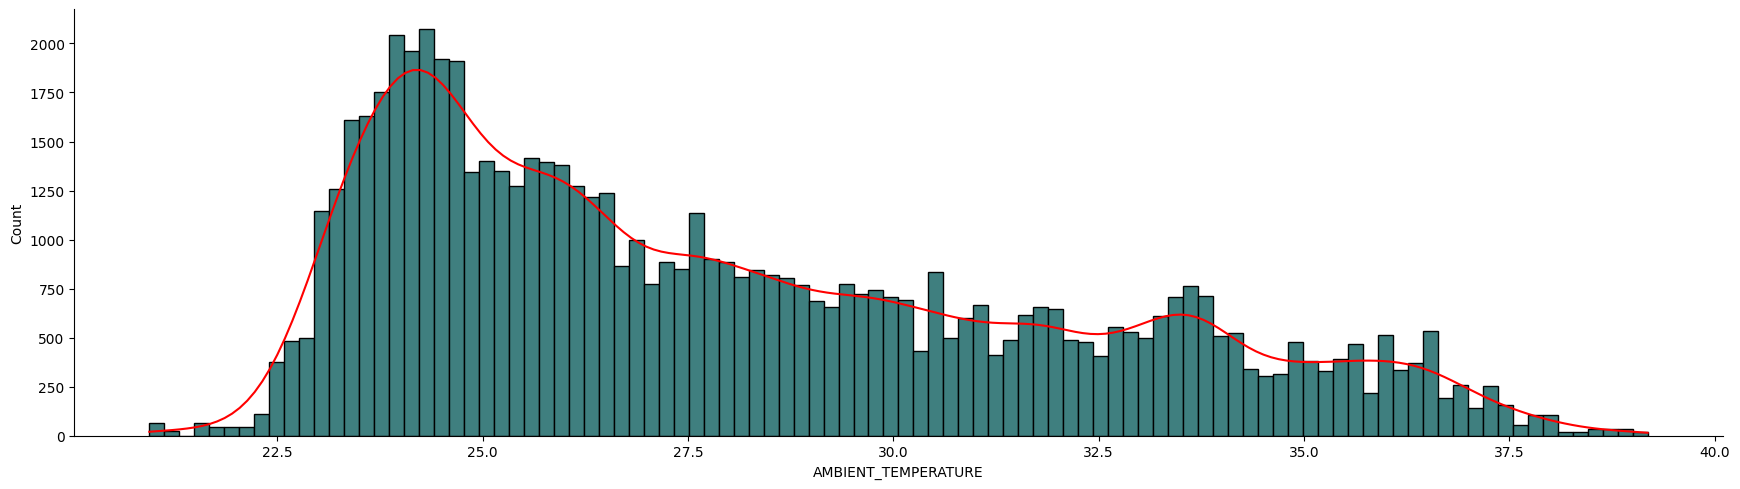

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

## **8.4 "MODULE_TEMPERATURE" Frequency**

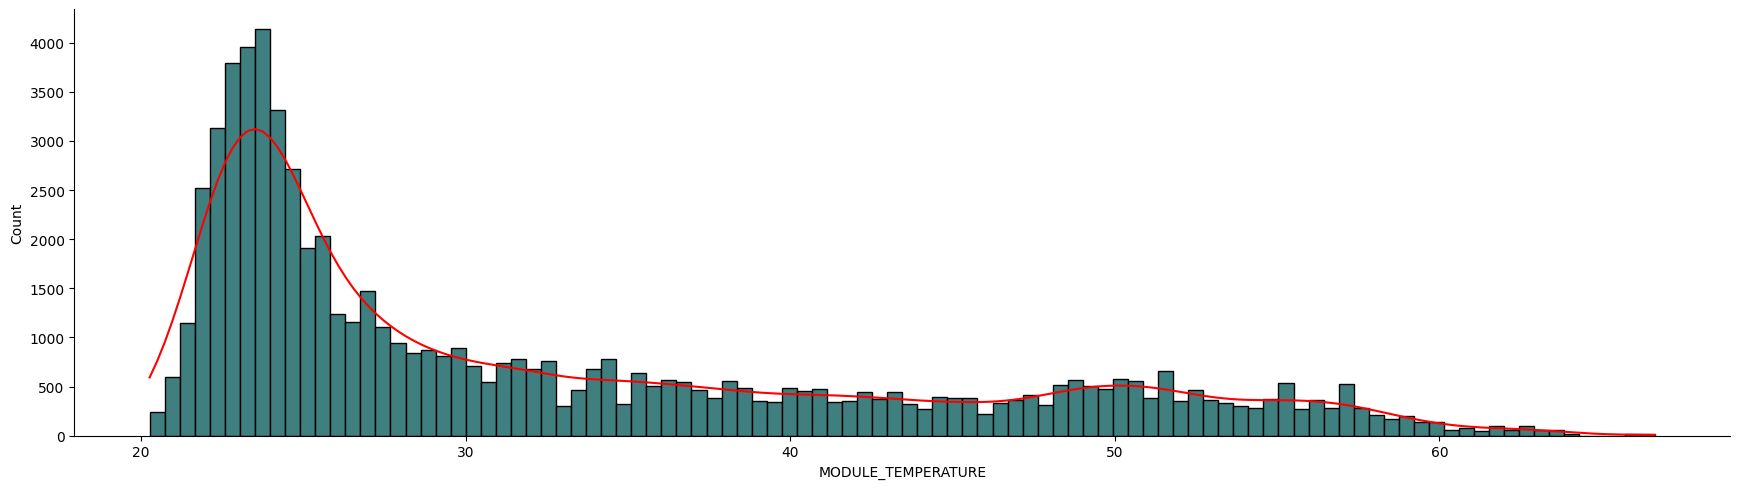

In [ ]:
sns.displot(data=df_solar, x="MODULE_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

## **8.5 Faults & Abnormalities detection in solar power plant generation**

### Multiple Plotting of DC_POWER generation on per day basis.

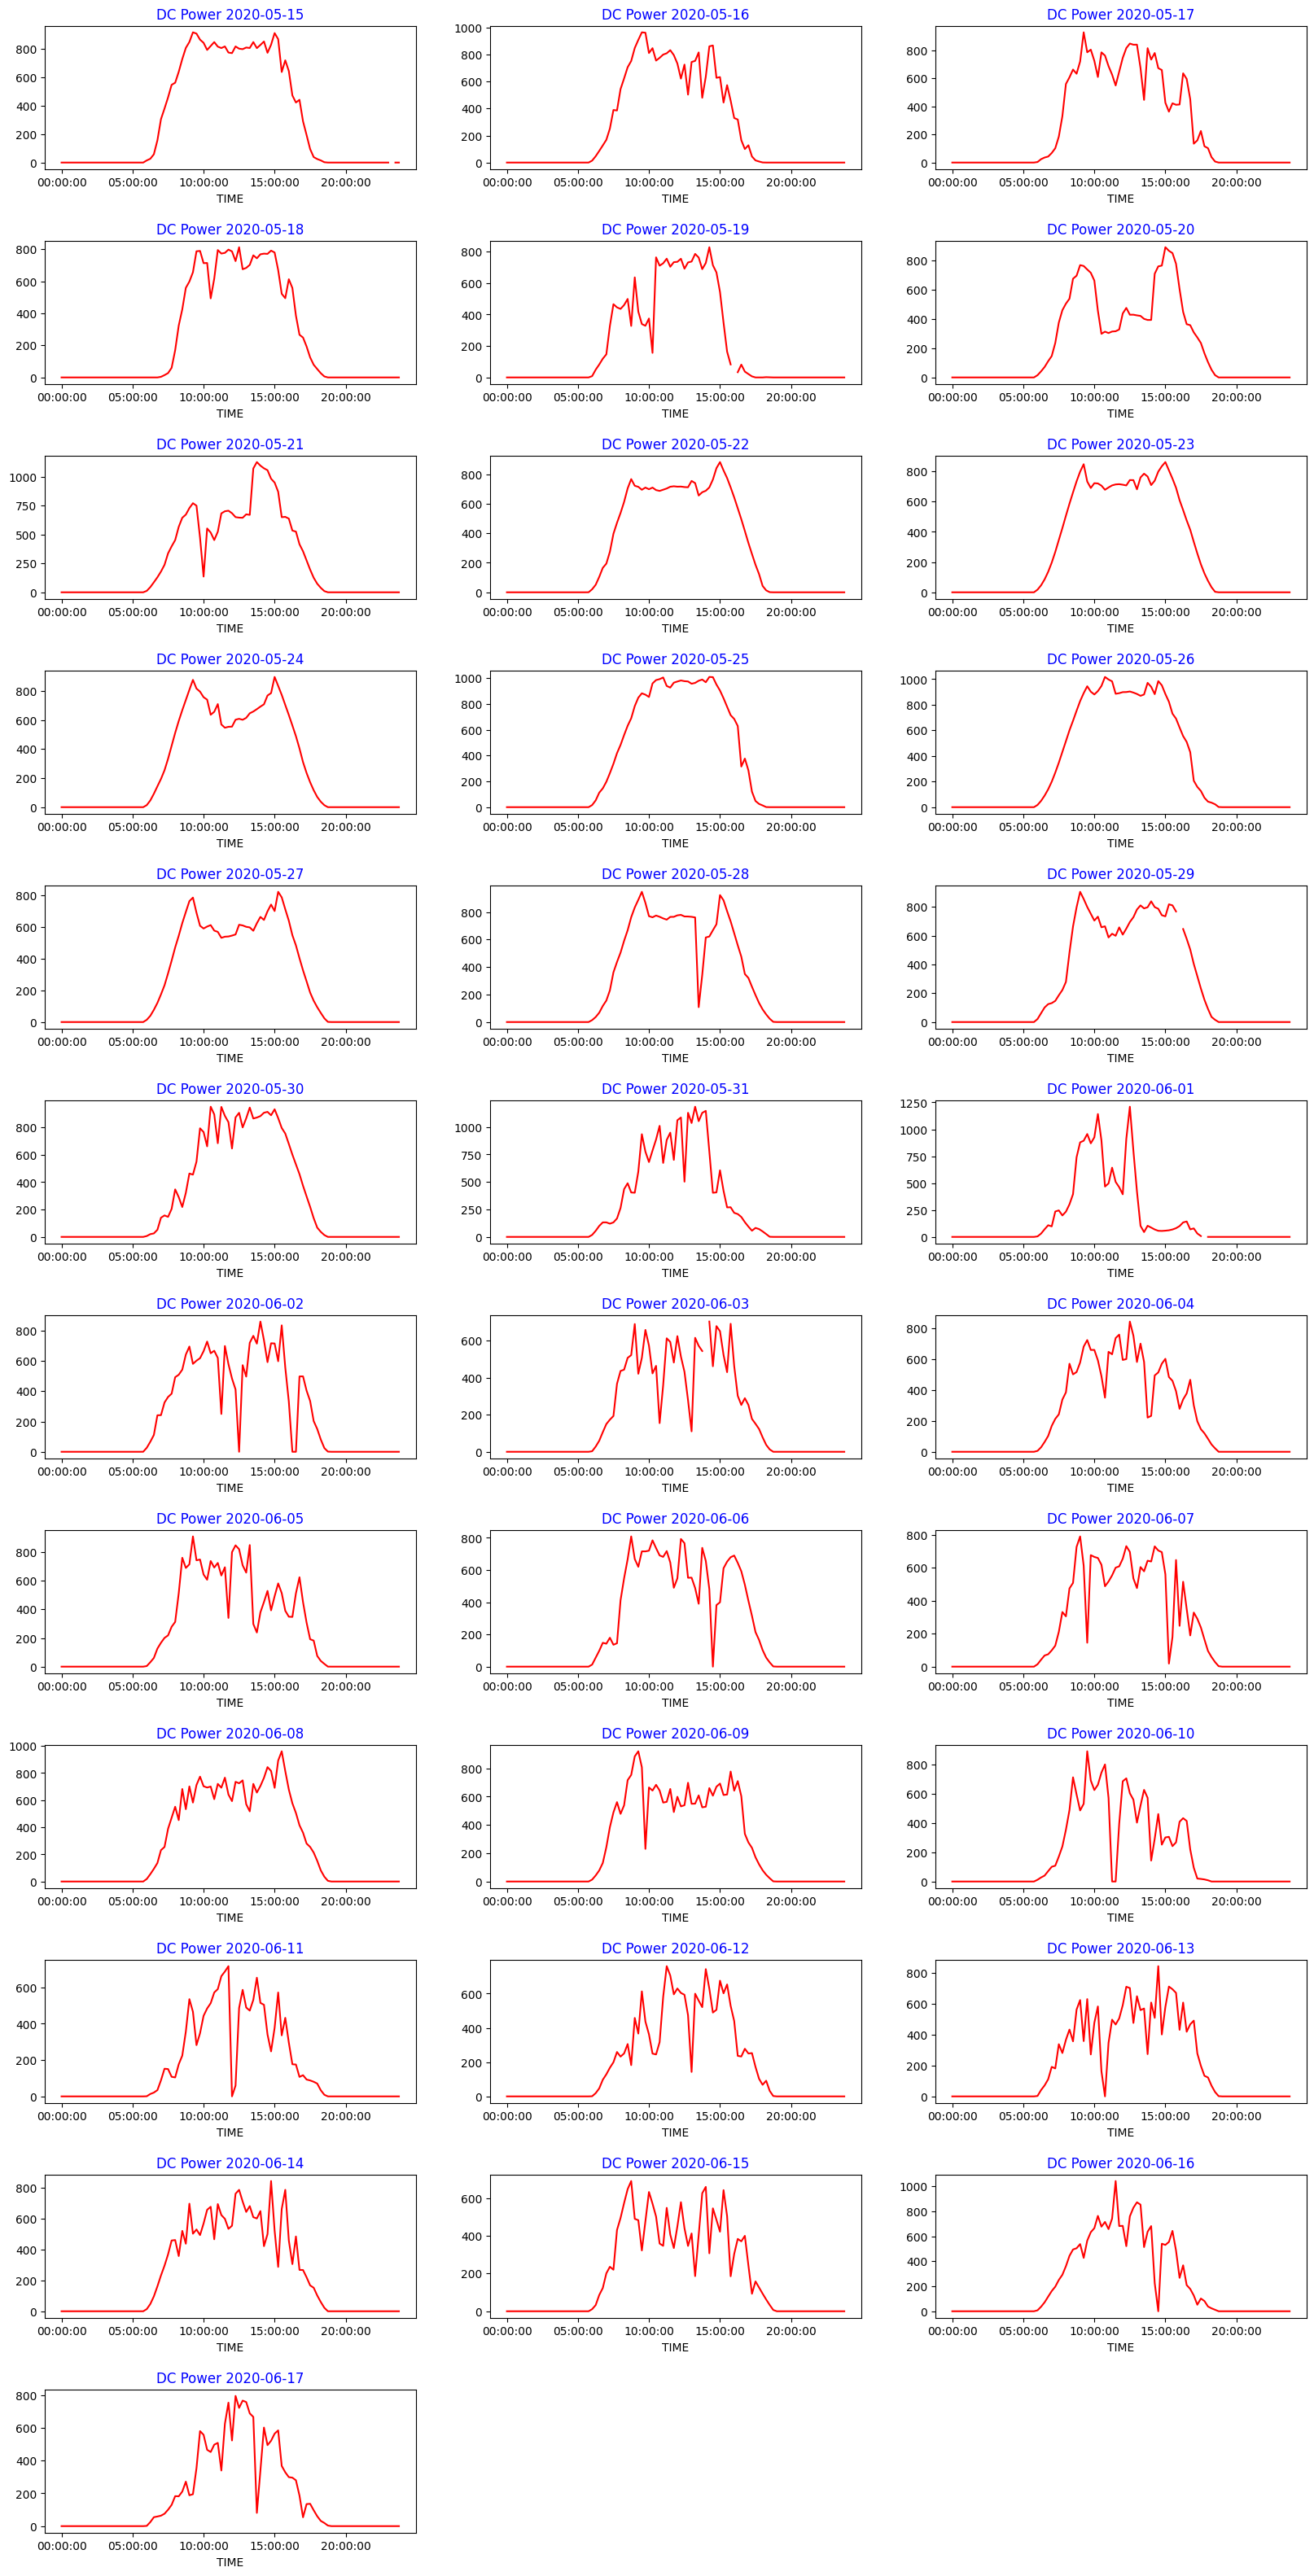

In [ ]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

Ideal Graph of Solar Power Generation

<img src="https://www.solarmarket.com.au/wp-content/uploads/2021/04/solar-output-graph.png" alt="Solar Panel" width="50%">
</center>

> The reason we get this shape is based on the angle of the sun to your panels. In the early morning, when the sun is still rising, it’s essentially at its lowest point in the sky. In order for the sunlight to reach your panels at this time of the day, it has to cut through the most amount of atmosphere. This is important to note, because energy from the sun is absorbed when it travels through the atmosphere. So, this means that the more atmosphere it travels through, the more energy is absorbed and the less that is available for your panels to convert into electricity. At midday, when the sun is directly overhead, sunlight doesn’t need to travel through as much atmosphere. Therefore, your panels will absorb more sunlight during this time.

- In winter, the same concept applies. However, on gloomier winter days there may be less sunlight for your panels to absorb.
- This can simply be explained by the sun being positioned lower in the sky than it is during summer.

Abnormalities in DC_POWER Generation

**Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.**

*Less Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-15
> 2. 2020-05-18
> 3. 2020-05-22
> 4. 2020-05-23
> 5. 2020-05-24
> 6. 2020-05-25
> 7. 2020-05-26

*High Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-19
> 2. 2020-05-28
> 3. 2020-05-29
> 4. 2020-06-02
> 5. 2020-06-03
> 6. 2020-06-04
> 7. 2020-06-13
> 8. 2020-06-14
> 9. 2020-06-17

*Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.*

> 1. 2020-06-03
> 2. 2020-06-11
> 3. 2020-06-12
> 4. 2020-06-15

**Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further**

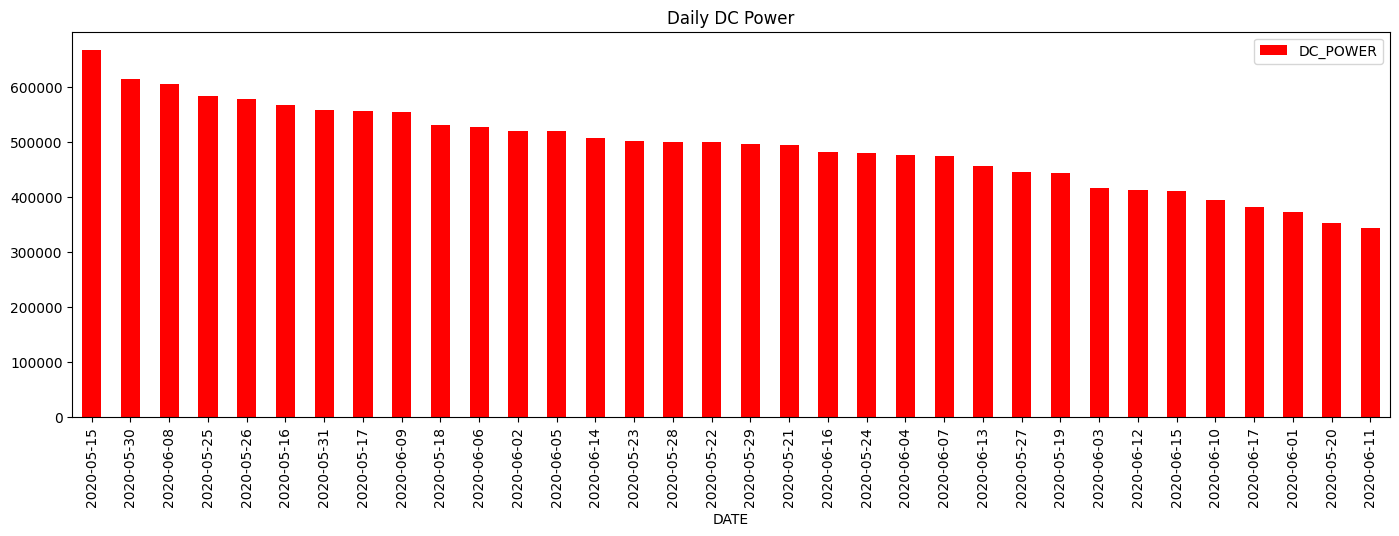

In [ ]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

**Form the per day DC_POWER generation graph we can find the average power generation per day.**

> *Highest average DC_POWER Generation is on*: **2020-05-15**

> *Lowest average DC_POWER Generation is on* : **2020-06-11**

NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.

### Multiple Plotting of IRRADIATION on per day basis.

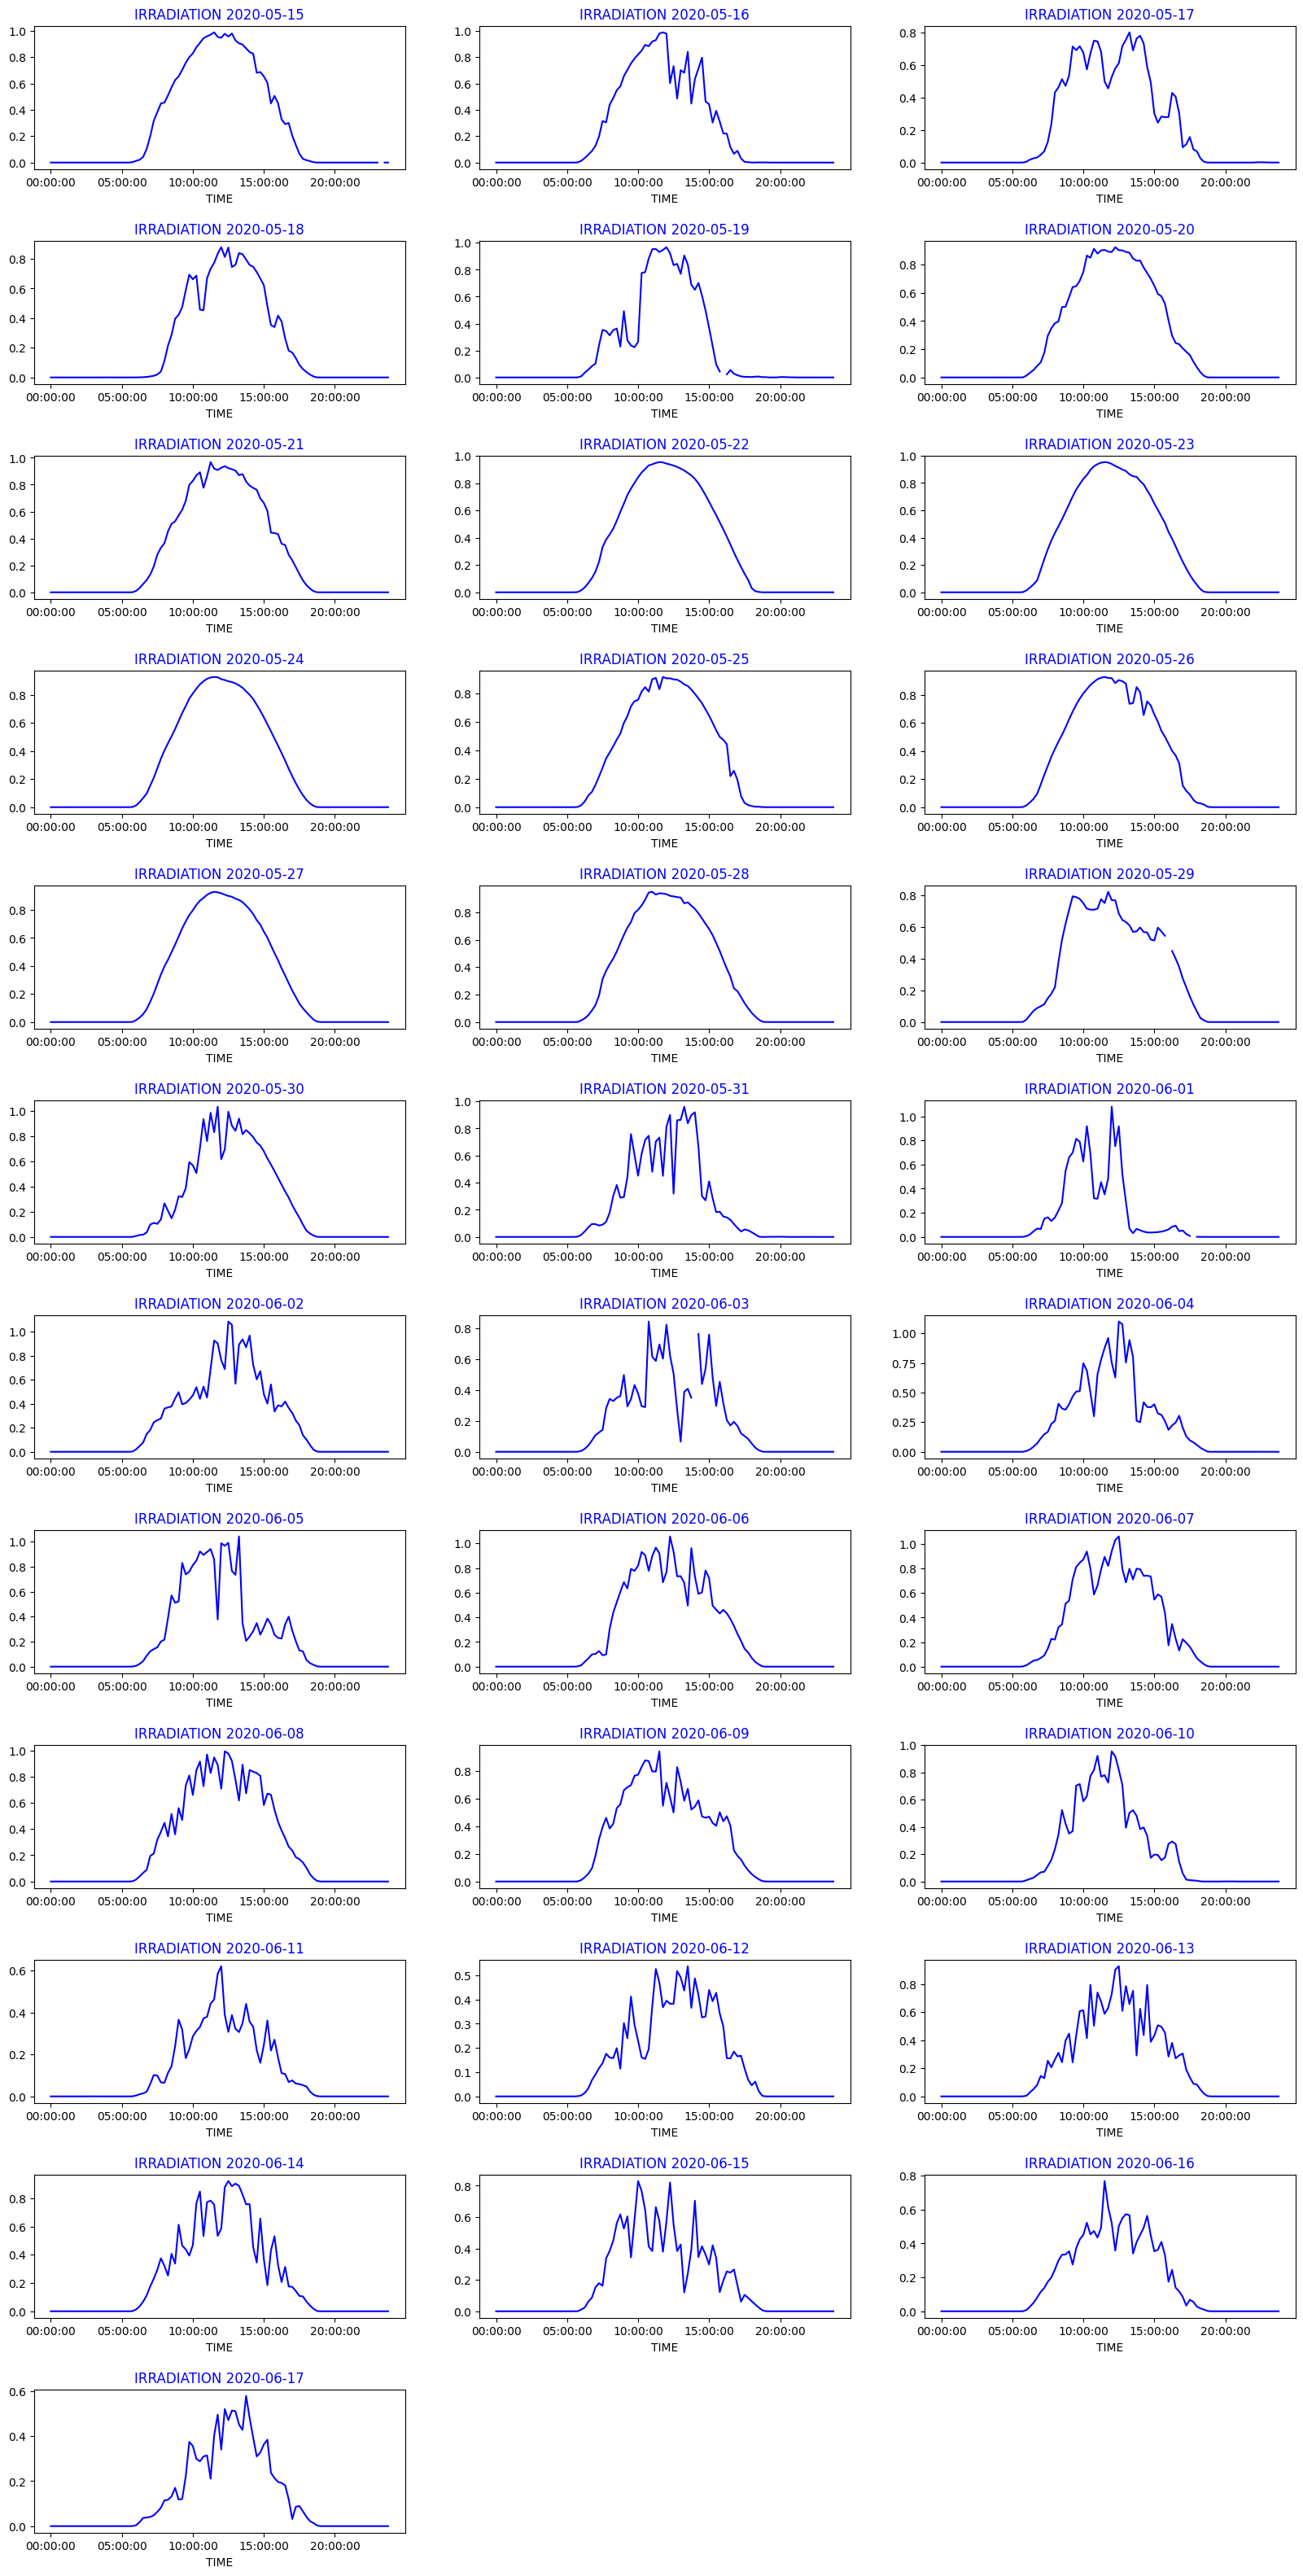

In [ ]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

**IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.**

- In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

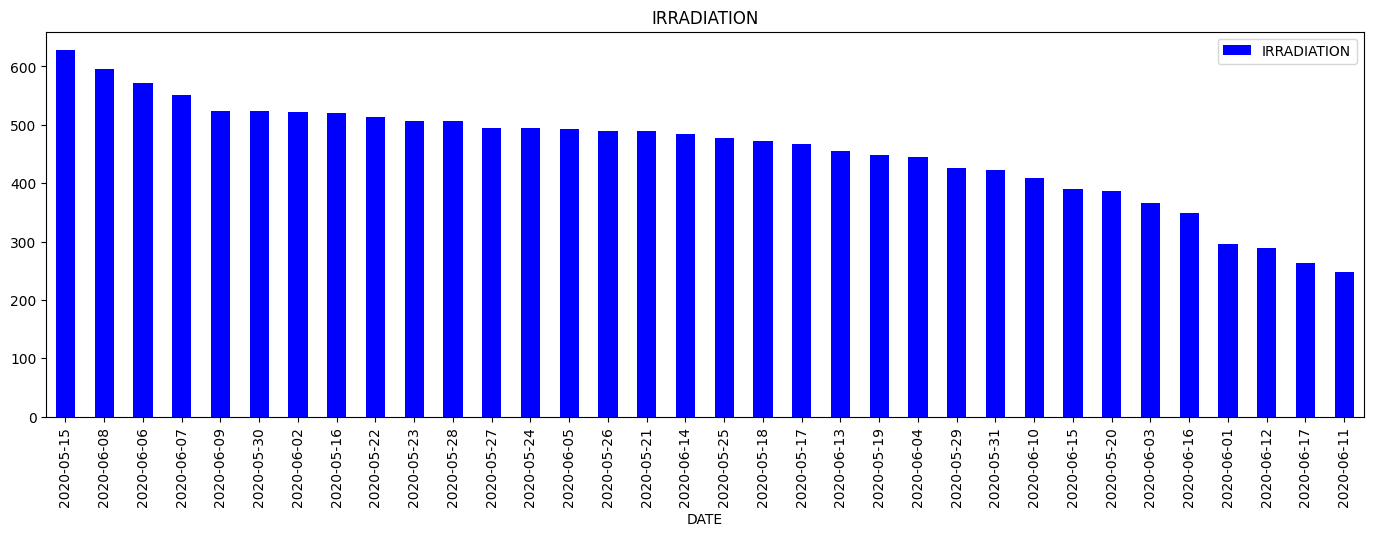

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

### Multiple Plotting of AMBIENT_TEMPERATURE on per day basis.

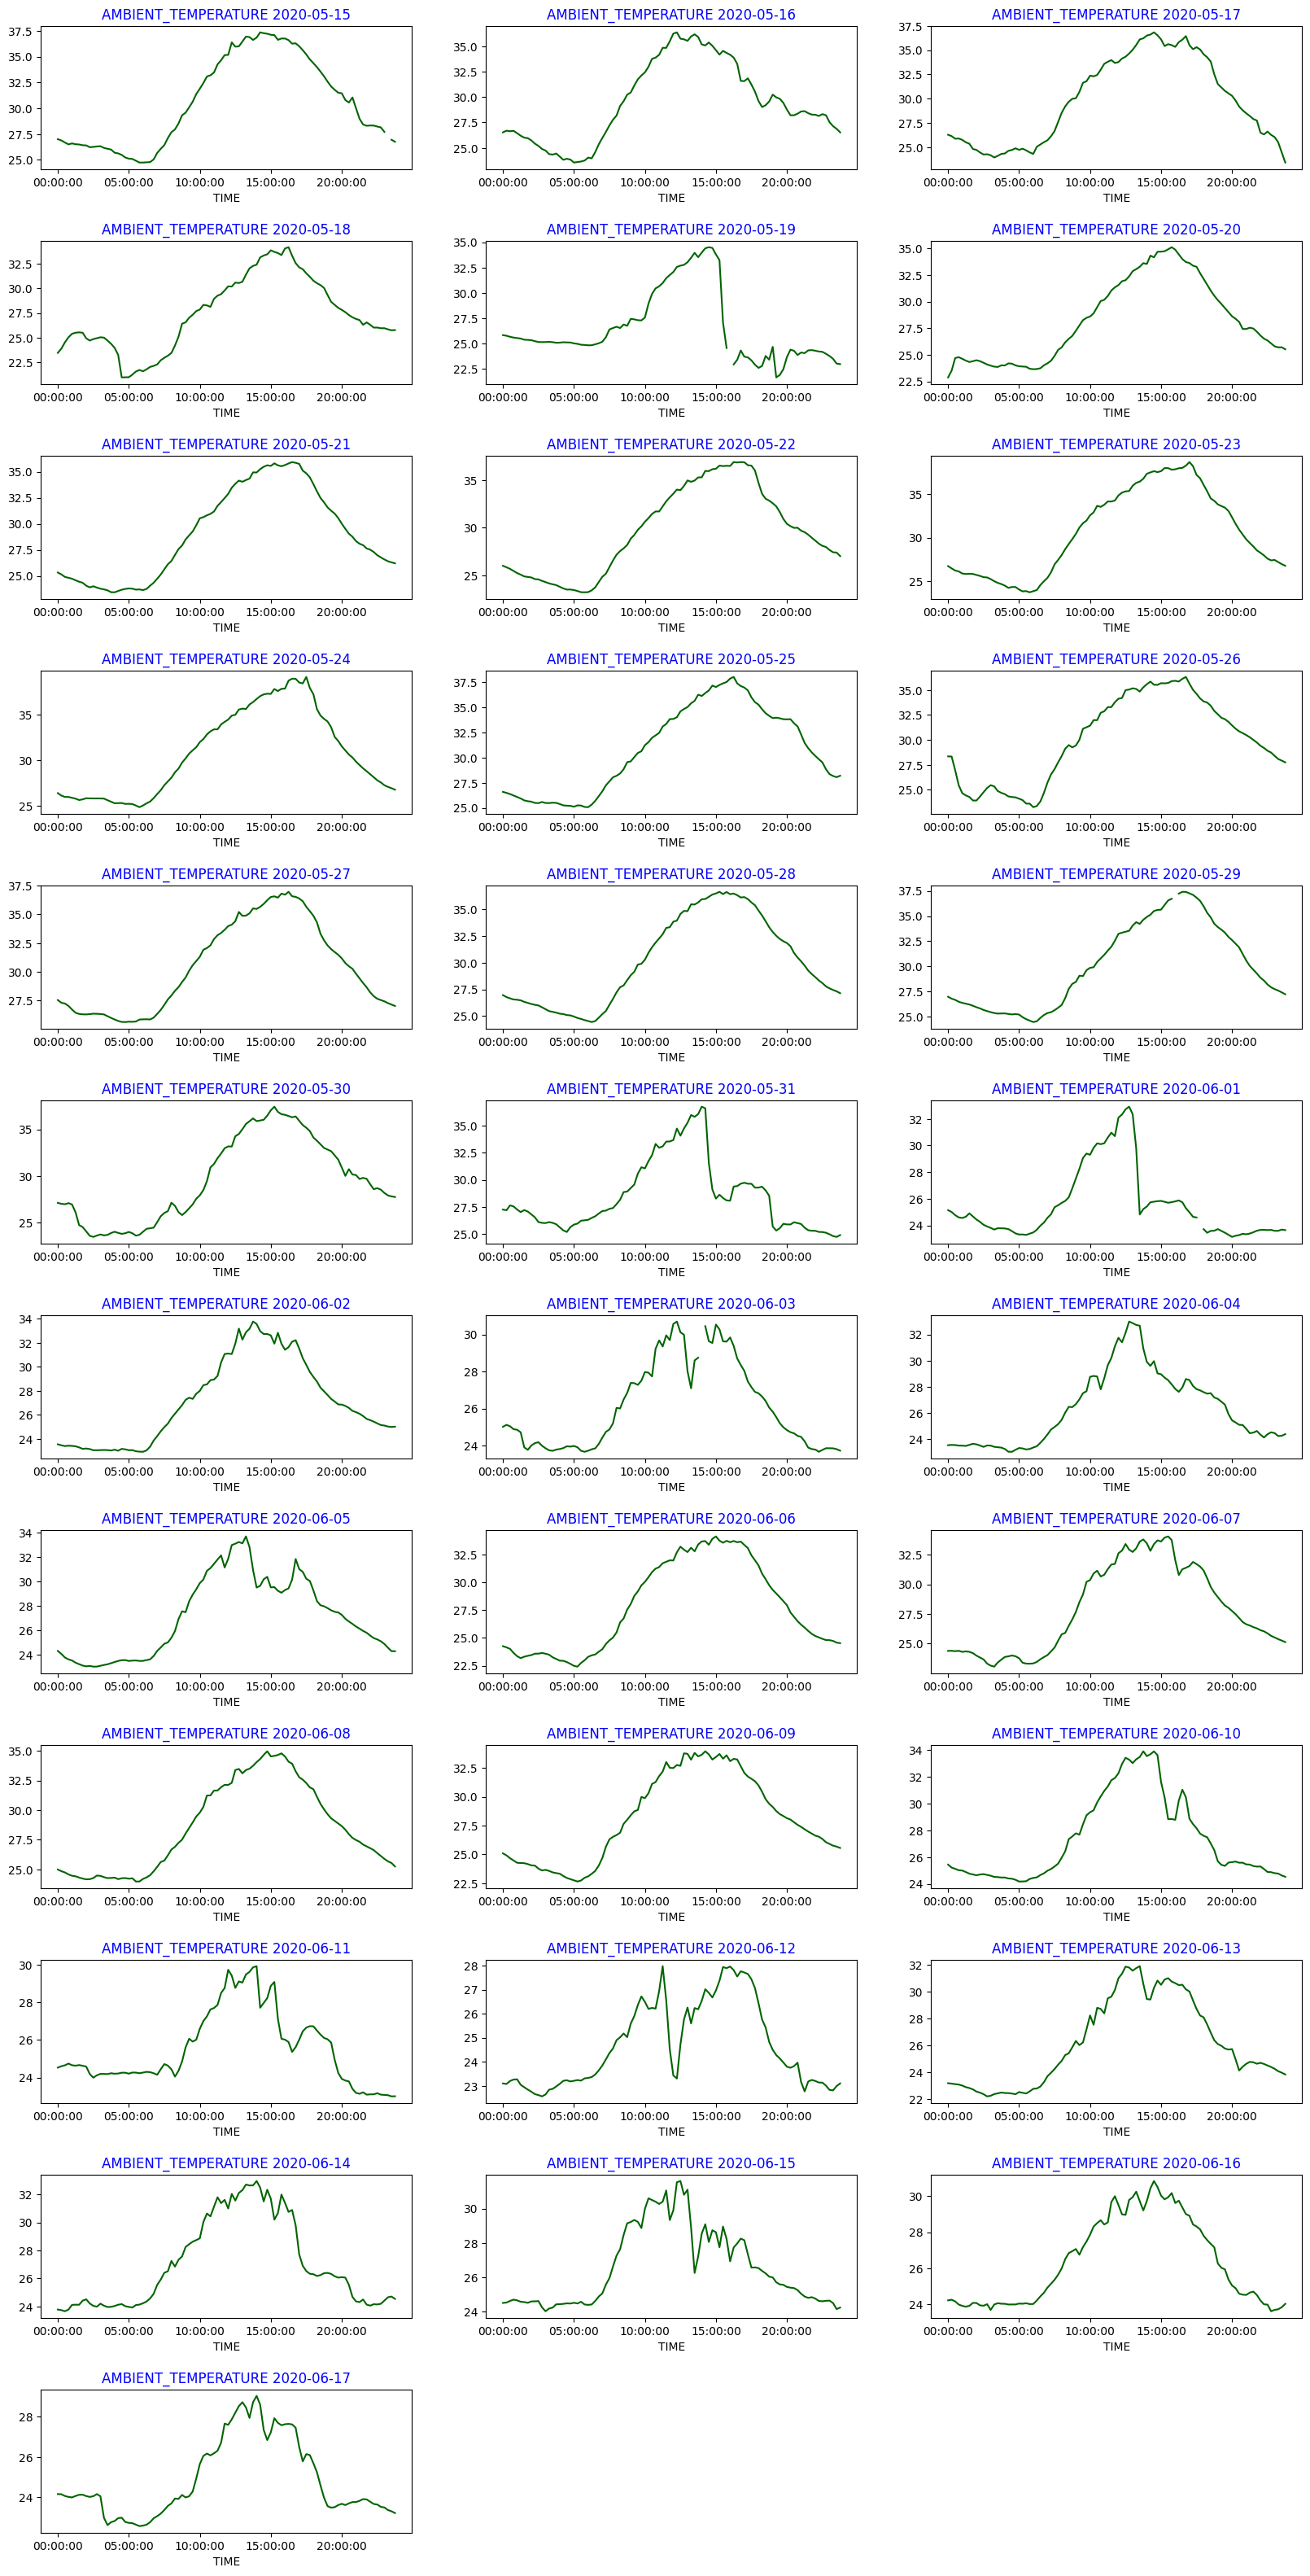

In [ ]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

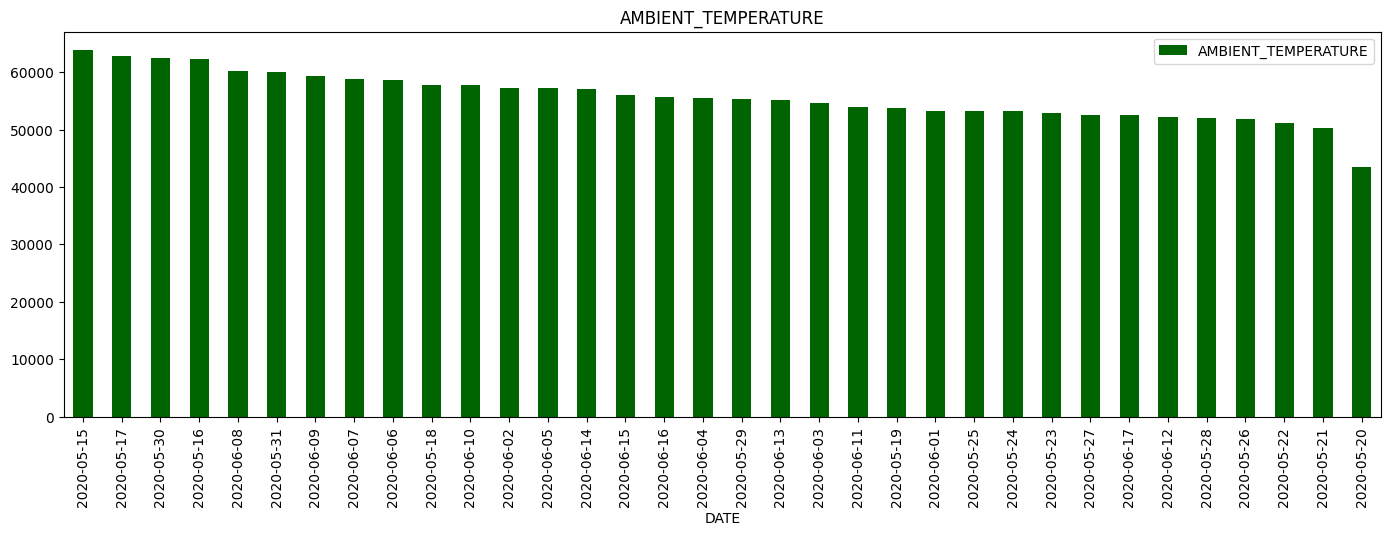

In [ ]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

## **8.6 Best and Worst Power generation comparision:**

Major Environmental Factors affecting the of solar power generation are.

> 1. The thickness of clouds is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output.
> 2. While we’ve looked at the sun’s positioning and how it can affect output, there’s another factor to consider when your system may not be performing at its maximum… even at midday.
> 3. Solar panel temperature is the number one reason behind your solar power system not achieving peak performance
> 4. Solar power generation is directly depends on Irradiation comming from the sun.

### Highest average DC_POWER is generated on "2020-05-15"  

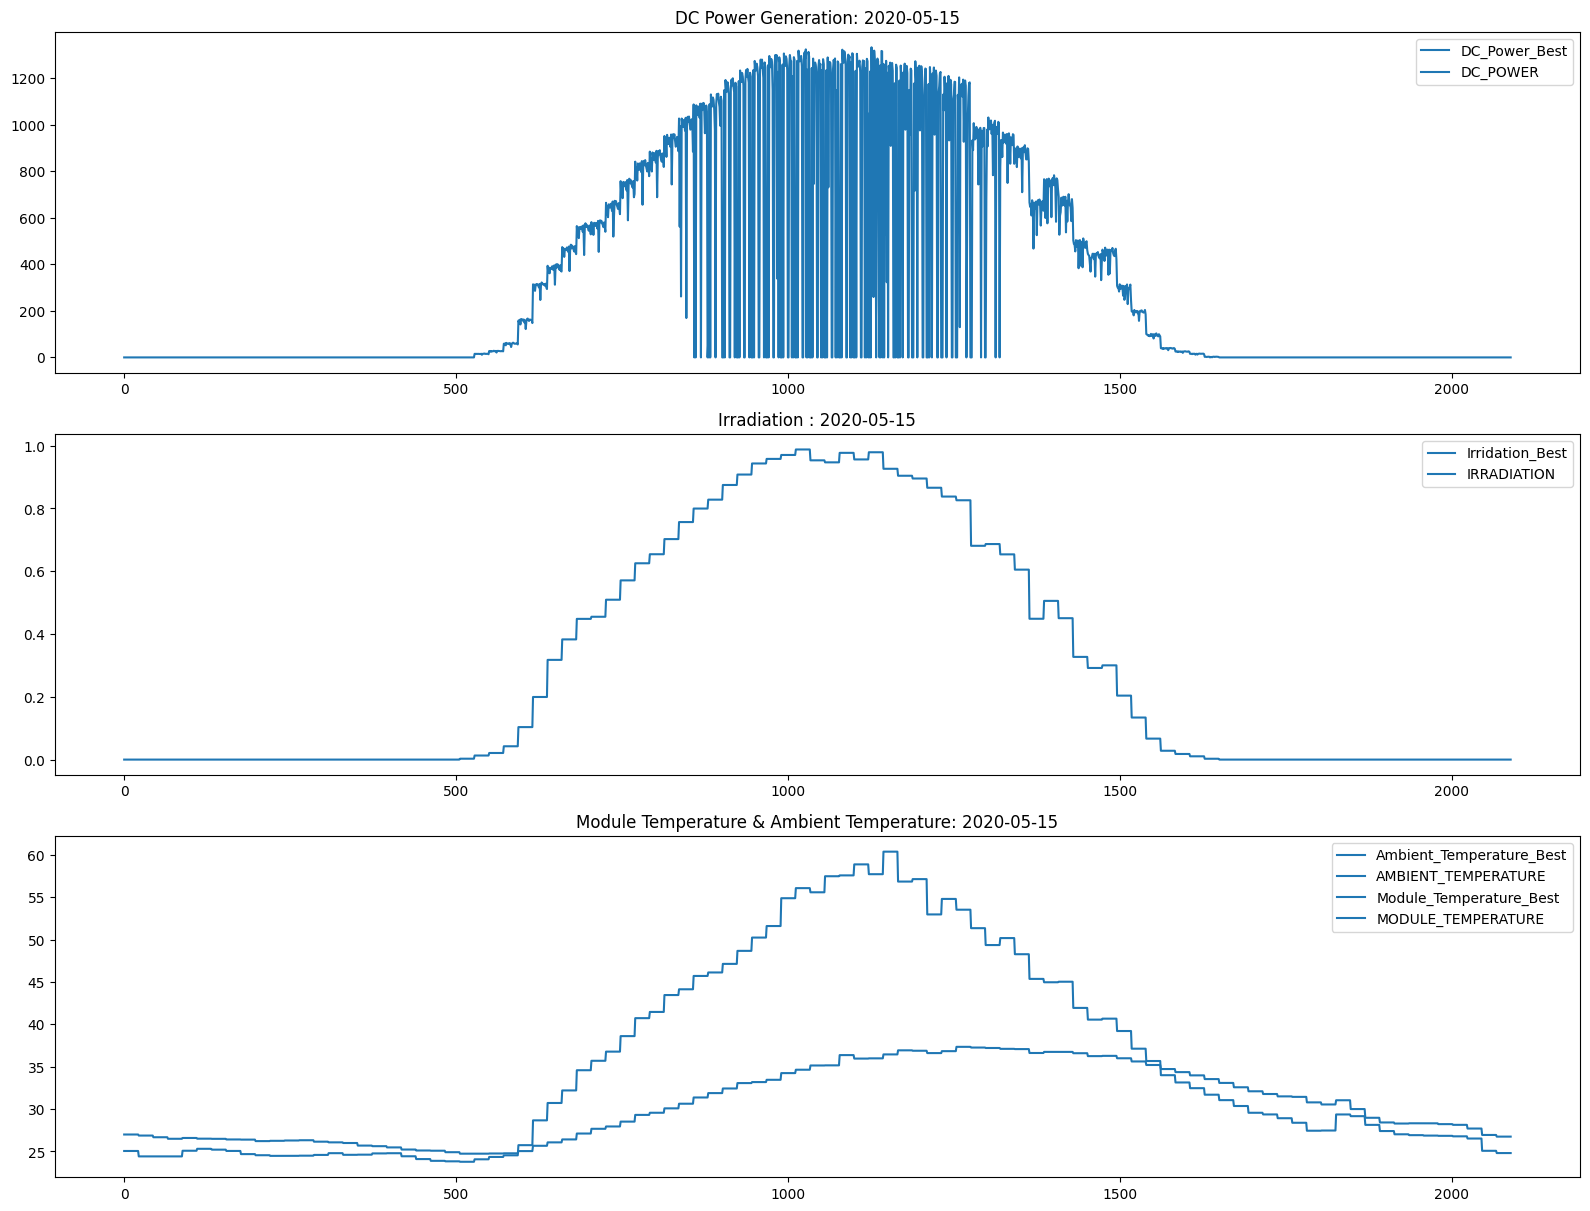

In [ ]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER), label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION), label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE), label="Ambient_Temperature_Best",color='green');
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE), label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

### Lowest average DC_POWER is generated on "2020-06-11"  

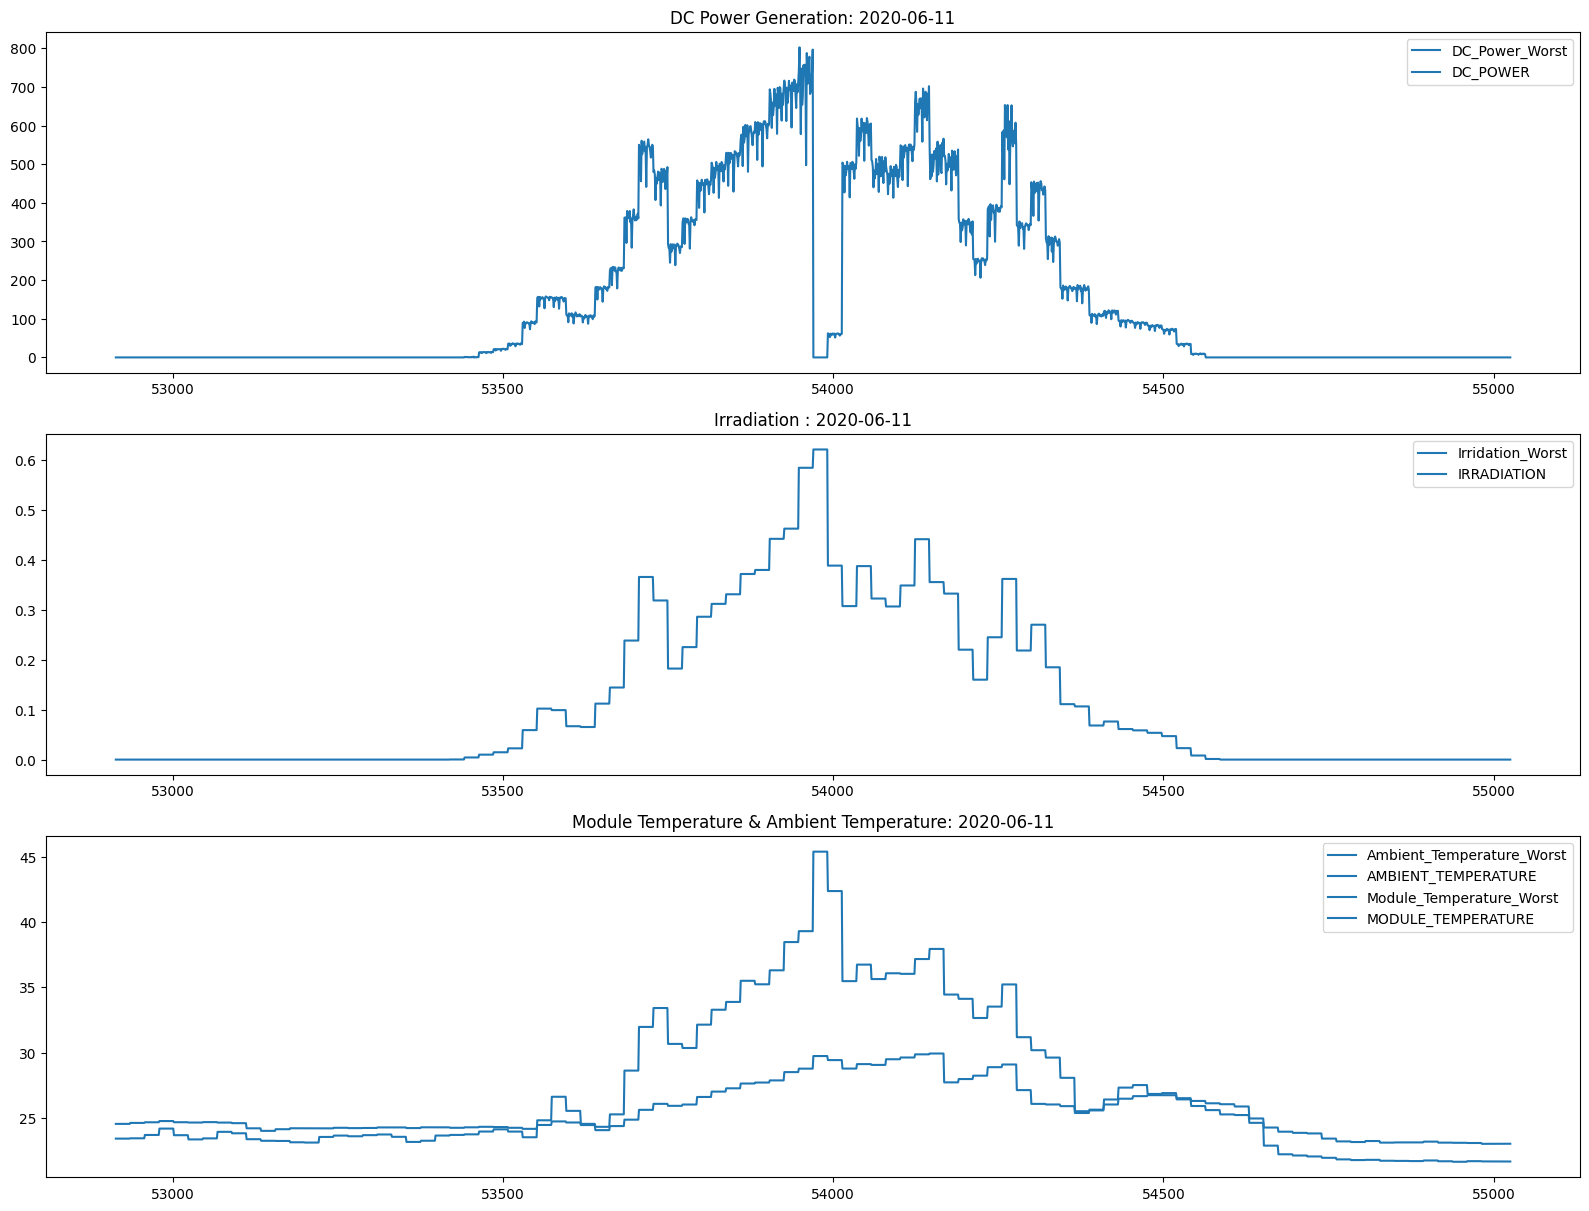

In [ ]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER), label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION), label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE), label="Ambient_Temperature_Worst",color='red');
sns.lineplot(data=(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE), label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph

**Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:**

> At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt.

> And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

> Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced.

<code style="background:yellow;color:red">The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system </code>

## **8.7 Generation by each Inverter**

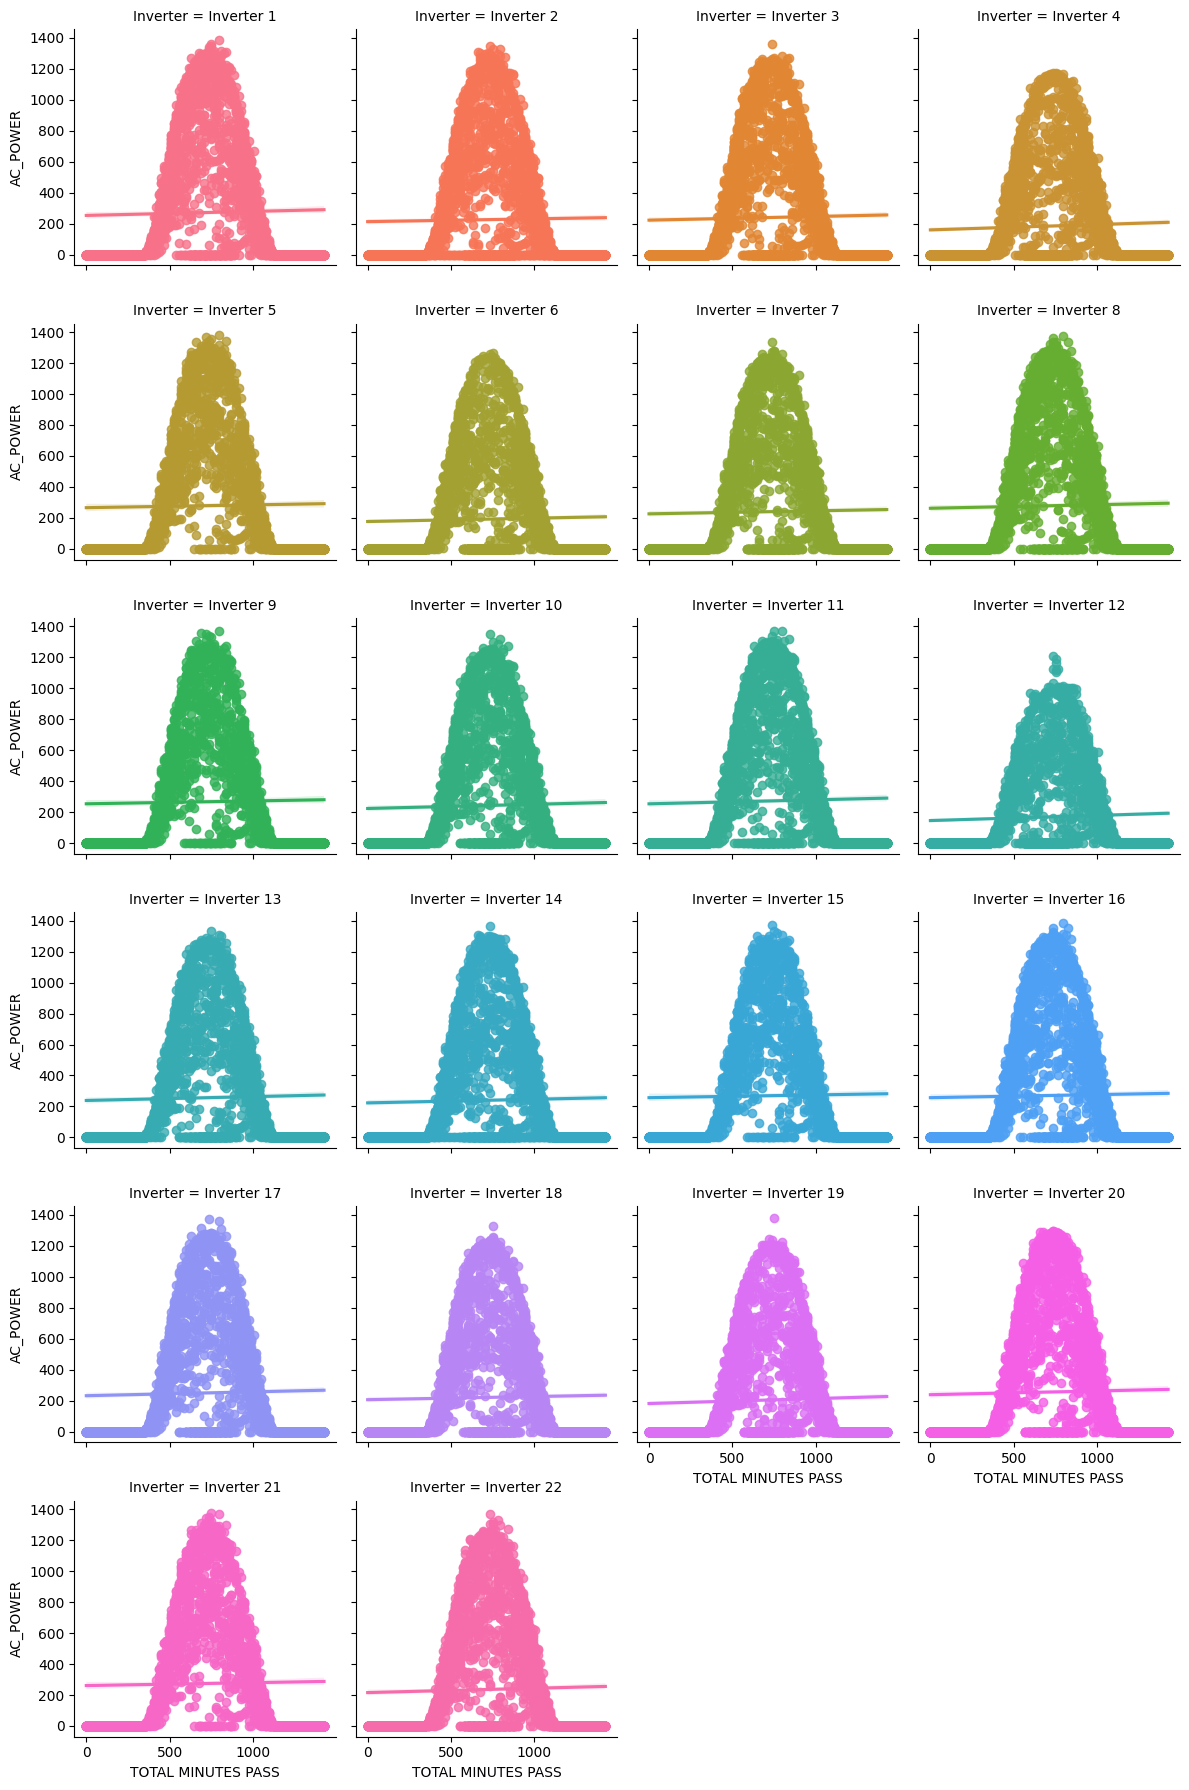

In [ ]:
sns.lmplot(y="AC_POWER",x="TOTAL MINUTES PASS",hue="Inverter",col="Inverter",height=3,col_wrap=4,data=df_solar,fit_reg=True);

## **8.8 Solar Power Plant Inverter Efficiency Calculation**

In [ ]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [ ]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [ ]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

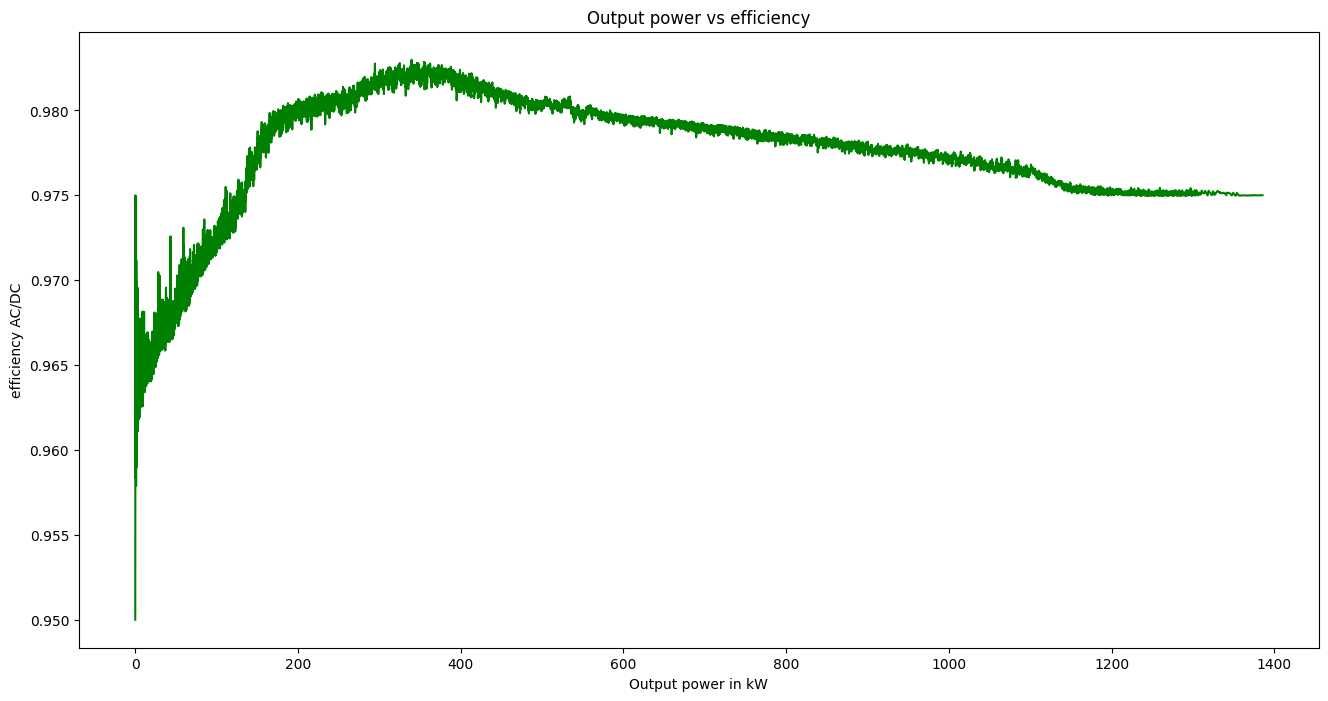

In [ ]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

11. What does inverter efficiency mean?

- In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

- The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

*Heat loss.*
- Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

- Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.

<img src="https://www.inverter.com/images/uploaded/inverter-output-power-efficiency-diagram.jpg" alt="Solar Panel" width="90%">
</center>

> For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

> This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.

[REFERENCE: ](https://www.inverter.com/what-is-inverter-efficiency)

## **8.9 Heatmap**

In [ ]:
df_solar.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DATE', 'TIME', 'DAY', 'MONTH', 'WEEK', 'HOURS',
       'MINUTES', 'TOTAL MINUTES PASS', 'DATE_STRING', 'Inverter_NUMBER',
       'Inverter'],
      dtype='object')

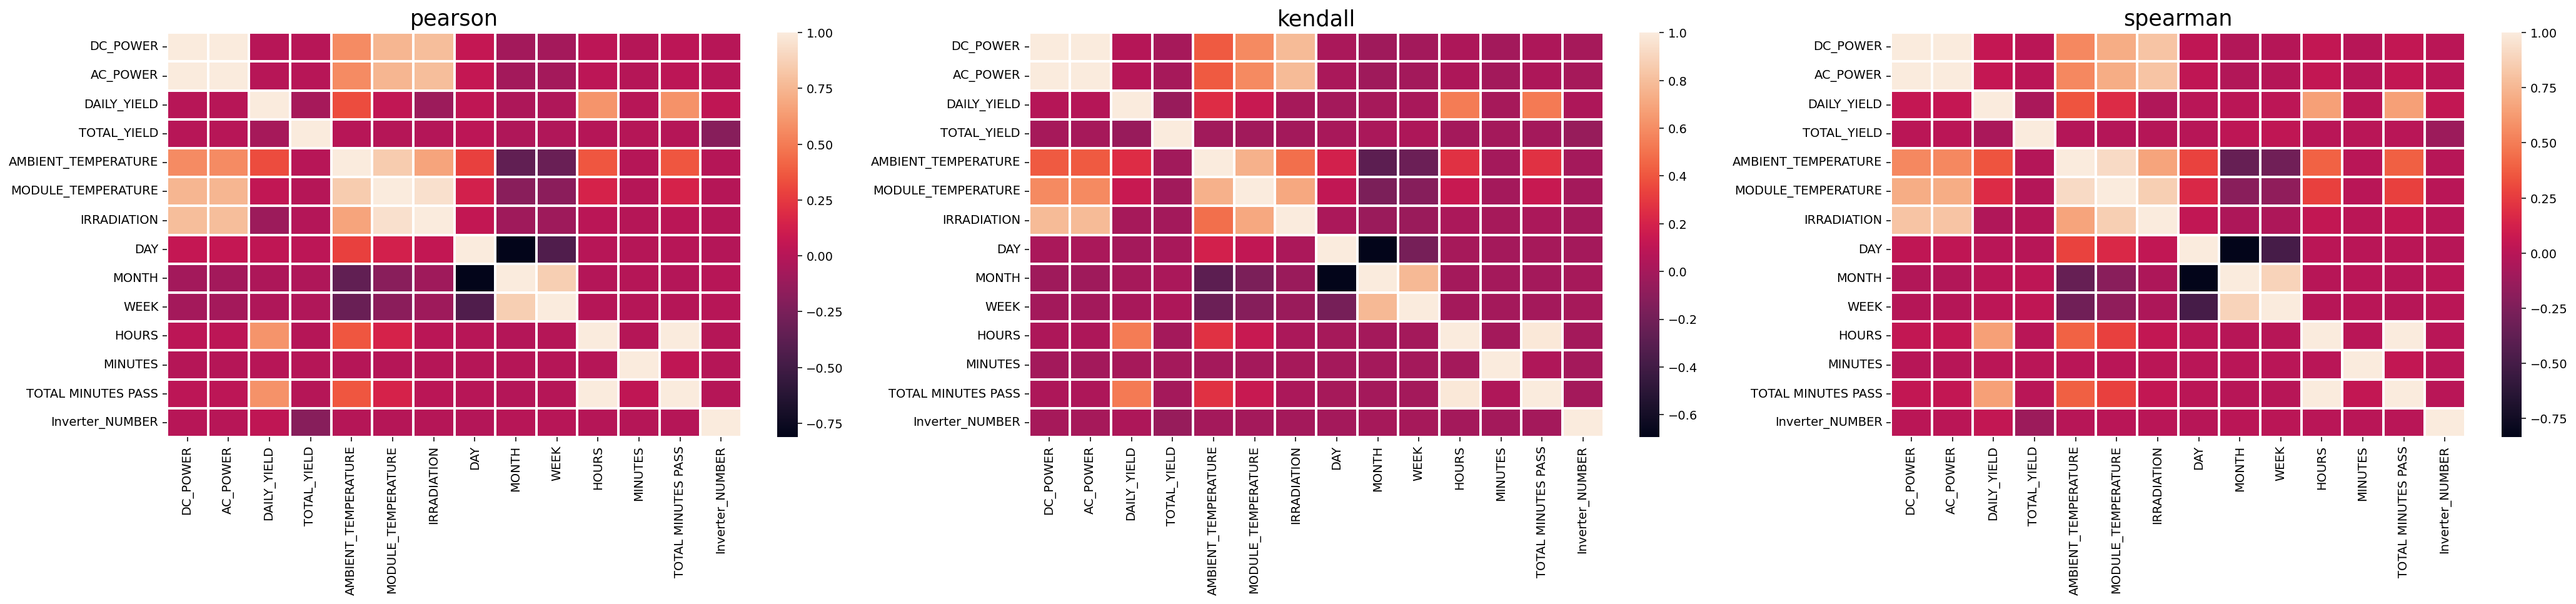

In [ ]:
num = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DAY', 'MONTH', 'WEEK', 'HOURS',
       'MINUTES', 'TOTAL MINUTES PASS','Inverter_NUMBER']
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df_solar[num].corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

# **9. Solar Power Prediction**

## **9.1 Test Train Split**

In [ ]:
data = df_solar.copy()
x = data[['DC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DAY', 'MONTH', 'WEEK', 'HOURS', 'TOTAL MINUTES PASS', 'Inverter_NUMBER']]
y = data['AC_POWER']

In [ ]:
x.head()

,DC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,HOURS,TOTAL MINUTES PASS,Inverter_NUMBER
0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,15,5,20,0,0,0
1,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,15,5,20,0,0,1
2,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,15,5,20,0,0,2
3,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,15,5,20,0,0,3
4,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,15,5,20,0,0,4


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=21)

## **9.2 Cross validation and train_test_score function**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [ ]:
def cv_score(ml_model, rstate = 11,cols = x.columns):
    i = 1
    cv_scores = []
    x1 = x.copy()
    x1 = x[cols]

    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(x1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = x1.loc[train_index],x1.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        R2_Score_val = r2_score(yvl, pred_val) * 100
        rmse_score_train = sqrt(mean_squared_error(ytr, train_val))
        rmse_score_val = sqrt(mean_squared_error(yvl, pred_val))
        sufix = ""
        msg = ""
        #msg += "Train RMSE: {:.5f} ".format(rmse_score_train)
        msg += "Valid RMSE: {:.5f},Valid R2 Score : {:.5f}".format(rmse_score_val, R2_Score_val)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(rmse_score_val)
        i+=1
    return cv_scores

In [ ]:
def train_test_score(ml_model):
  model=ml_model
  model.fit(xtrain,ytrain)
  train_pre = model.predict(xtrain)
  train_R2_score = r2_score(ytrain, train_pre)

  test_pre = model.predict(xtest)
  test_R2_score = r2_score(ytest, test_pre)
  diff = train_R2_score - test_R2_score
  print("Train R2 SCORE: ",train_R2_score)
  print("Test R2 SCORE: ",test_R2_score)
  print("Diff of Train Test R2 SCORE: ",diff)

## **9.3 KNN Regression**

### 9.3.1 Scaling the data (Using MinMax Scaler)

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()

,DC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,HOURS,TOTAL MINUTES PASS,Inverter_NUMBER
0,0.0,0.954624,0.001081,0.332381,0.10342,0.0,0.466667,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.540625,0.332381,0.10342,0.0,0.466667,0.0,0.0,0.0,0.0,0.047619
2,0.0,0.311489,0.999912,0.332381,0.10342,0.0,0.466667,0.0,0.0,0.0,0.0,0.095238
3,0.0,0.027341,0.000758,0.332381,0.10342,0.0,0.466667,0.0,0.0,0.0,0.0,0.142857
4,0.0,0.321787,0.008871,0.332381,0.10342,0.0,0.466667,0.0,0.0,0.0,0.0,0.190476


### 9.3.2 Test Train Split for KNN

In [ ]:
#Splitting the data into Train and Validation set
from sklearn.model_selection import train_test_split
xtrain_KNN, xtest_KNN, ytrain_KNN, ytest_KNN = train_test_split(x_scaled,y,test_size=1/3, random_state=0)


### 9.3.3 KNN Cross validation and train_test_score function

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [ ]:
def cv_score_KNN(ml_model, rstate = 11,cols = x_scaled.columns):
    i = 1
    cv_scores = []
    x1 = x_scaled.copy()
    x1 = x_scaled[cols]

    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(x1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = x1.loc[train_index],x1.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        R2_Score_val = r2_score(yvl, pred_val) * 100
        rmse_score_train = sqrt(mean_squared_error(ytr, train_val))
        rmse_score_val = sqrt(mean_squared_error(yvl, pred_val))
        sufix = ""
        msg = ""
        #msg += "Train RMSE: {:.5f} ".format(rmse_score_train)
        msg += "Valid RMSE: {:.5f},Valid R2 Score : {:.5f}".format(rmse_score_val, R2_Score_val)
        print("{}".format(msg))
        # Save scores
        cv_scores.append(rmse_score_val)
        i+=1
    return cv_scores

In [ ]:
def train_test_score_KNN(ml_model):
  model=ml_model
  model.fit(xtrain_KNN,ytrain_KNN)
  train_pre = model.predict(xtrain_KNN)
  train_R2_score = r2_score(ytrain_KNN, train_pre)

  test_pre = model.predict(xtest_KNN)
  test_R2_score = r2_score(ytest_KNN, test_pre)
  diff = train_R2_score - test_R2_score
  print("Train R2 SCORE: ",train_R2_score)
  print("Test R2 SCORE: ",test_R2_score)
  print("Diff of Train Test R2 SCORE: ",diff)

### 9.3.4 Hyperparameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
KNN_clf = KNeighborsRegressor()


parameter_grid = {
    'n_neighbors' : [10, 20, 30, 40, 50]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=KNN_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain_KNN, ytrain_KNN)

gridsearch.best_params_

{'n_neighbors': 10}

In [ ]:
KNN_clf = KNeighborsRegressor()


parameter_grid = {
    'n_neighbors' : [1, 2, 3, 5, 10]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=KNN_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain_KNN, ytrain_KNN)

gridsearch.best_params_

{'n_neighbors': 5}

In [ ]:
KNN_train_test_score_1 = train_test_score_KNN(KNeighborsRegressor(5))

Train R2 SCORE:  0.9961571119259266
Test R2 SCORE:  0.9940690264730159
Diff of Train Test R2 SCORE:  0.0020880854529107262


In [ ]:
KNN_scores_1 = cv_score_KNN(KNeighborsRegressor(5))


1 of kfold 5
Valid RMSE: 26.02416,Valid R2 Score : 99.48118

2 of kfold 5
Valid RMSE: 26.09136,Valid R2 Score : 99.48616

3 of kfold 5
Valid RMSE: 27.04325,Valid R2 Score : 99.44538

4 of kfold 5
Valid RMSE: 26.46851,Valid R2 Score : 99.46870

5 of kfold 5
Valid RMSE: 26.59793,Valid R2 Score : 99.45092


In [ ]:
KNN_scores_2 = cv_score_KNN(KNeighborsRegressor())


1 of kfold 5
Valid RMSE: 26.02416,Valid R2 Score : 99.48118

2 of kfold 5
Valid RMSE: 26.09136,Valid R2 Score : 99.48616

3 of kfold 5
Valid RMSE: 27.04325,Valid R2 Score : 99.44538

4 of kfold 5
Valid RMSE: 26.46851,Valid R2 Score : 99.46870

5 of kfold 5
Valid RMSE: 26.59793,Valid R2 Score : 99.45092


### 9.3.5 Appling model

In [ ]:
KNN_cv_scores = cv_score_KNN(KNeighborsRegressor(5))


1 of kfold 5
Valid RMSE: 26.02416,Valid R2 Score : 99.48118

2 of kfold 5
Valid RMSE: 26.09136,Valid R2 Score : 99.48616

3 of kfold 5
Valid RMSE: 27.04325,Valid R2 Score : 99.44538

4 of kfold 5
Valid RMSE: 26.46851,Valid R2 Score : 99.46870

5 of kfold 5
Valid RMSE: 26.59793,Valid R2 Score : 99.45092


In [ ]:
KNN_train_test_score = train_test_score_KNN(KNeighborsRegressor(5))

Train R2 SCORE:  0.9961571119259266
Test R2 SCORE:  0.9940690264730159
Diff of Train Test R2 SCORE:  0.0020880854529107262


## **9.4 Linear Regression**


### 9.4.1 Ridge regularization

In [ ]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [ ]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    mrss_train_list=[]
    mrss_test_list=[]
    diff_list=[]
    for i in alpha:
      #Fit the model
      ridgereg = Ridge(alpha=i,random_state= 7)
      ridgereg.fit(train_x,train_y)
      train_y_pred = ridgereg.predict(train_x)
      test_y_pred = ridgereg.predict(test_x)

      #Return the result in pre-defined format
      mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
      mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
      diff = mrss_train - mrss_test
      mrss_train_list.append(mrss_train)
      mrss_test_list.append(mrss_test)
      diff_list.append(diff)

    return mrss_train_list, mrss_test_list, diff_list

In [ ]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 10, 20, 25,100]

In [ ]:
#Iterate over the 10 alpha values:
train,test,diff = ridge_regression(xtrain, ytrain, xtest, ytest,alpha_ridge)

In [ ]:
score = pd.DataFrame({'train score': train, 'test score': test, 'diff': diff}, index = alpha_ridge)
score

,train score,test score,diff
0.000000e+00,0.838928,0.726804,0.112123
1.000000e-08,0.838928,0.726804,0.112123
1.000000e-04,0.838928,0.726804,0.112123
1.000000e-03,0.838928,0.726804,0.112123
1.000000e-02,0.838928,0.726804,0.112124
1.000000e+00,0.838928,0.726799,0.112128
1.000000e+01,0.838930,0.726760,0.112170
2.000000e+01,0.838935,0.726724,0.112211
2.500000e+01,0.838939,0.726708,0.112231
1.000000e+02,0.839028,0.726581,0.112447


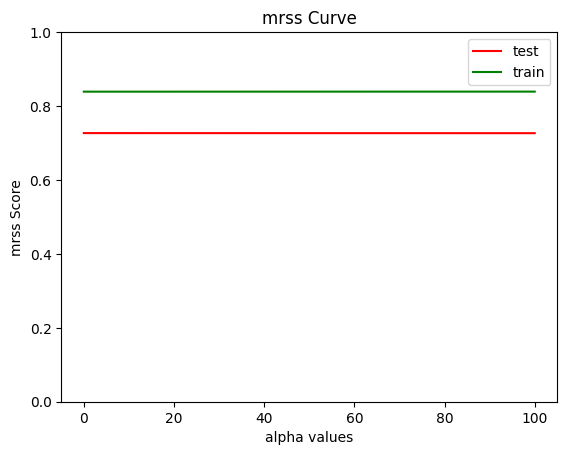

In [ ]:
# plotting the Curves
plt.plot(alpha_ridge, test, color = 'red' , label = 'test')
plt.plot(alpha_ridge, train, color = 'green', label = 'train')
plt.xlabel('alpha values')
plt.ylabel('mrss Score')
plt.title('mrss Curve')
plt.ylim(0,1	)
plt.ylim(0,)
plt.legend()

### 9.4.2 Appling model

In [ ]:
LR_cv_scores = cv_score(LinearRegression())


1 of kfold 5
Valid RMSE: 0.87991,Valid R2 Score : 99.99941

2 of kfold 5
Valid RMSE: 0.88029,Valid R2 Score : 99.99942

3 of kfold 5
Valid RMSE: 0.87203,Valid R2 Score : 99.99942

4 of kfold 5
Valid RMSE: 0.87373,Valid R2 Score : 99.99942

5 of kfold 5
Valid RMSE: 1.00537,Valid R2 Score : 99.99922


In [ ]:
LR_train_test_score = train_test_score(LinearRegression())

Train R2 SCORE:  0.9999936158233641
Test R2 SCORE:  0.9999944083224609
Diff of Train Test R2 SCORE:  -7.924990967911327e-07


## **9.5 Decision Tree Regressior**

### 9.5.1 Hyperparameter tuning

In [ ]:
DTR_clf = DecisionTreeRegressor(random_state= 3)


parameter_grid = {
    'max_depth' : [10,30,50],
    'min_samples_split' : [2,10,20,30],
    'min_samples_leaf' : [1,10,20,30],
    'max_features': [10,30,50],
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=DTR_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 30,
 'max_features': 30,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [ ]:
DTR_clf = DecisionTreeRegressor(random_state= 3)


parameter_grid = {
    'max_depth' : [20,30,40],
    'min_samples_split' : [2],
    'min_samples_leaf' : [5,10,15],
    'max_features': [20,30,40]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=DTR_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 20,
 'max_features': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [ ]:
DTR_clf = DecisionTreeRegressor(random_state= 3)


parameter_grid = {
    'max_depth' : [25,20,15],
    'min_samples_split' : [2],
    'min_samples_leaf' : [5,6,7,8],
    'max_features': [25,20,15]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=DTR_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 15,
 'max_features': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [ ]:
DT_train_test_score_1 = train_test_score(DecisionTreeRegressor(random_state= 0))

Train R2 SCORE:  1.0
Test R2 SCORE:  0.9999983730480904
Diff of Train Test R2 SCORE:  1.6269519096390184e-06


In [ ]:
DT_train_test_score_2 = train_test_score(DecisionTreeRegressor(random_state= 0,min_samples_leaf=5, min_samples_split=2, max_depth=15, max_features=25))

Train R2 SCORE:  0.9999991420133029
Test R2 SCORE:  0.9999988625462807
Diff of Train Test R2 SCORE:  2.794670221906159e-07


In [ ]:
DT_cv_scores_1 = cv_score(DecisionTreeRegressor(random_state= 0))


1 of kfold 5
Valid RMSE: 0.71436,Valid R2 Score : 99.99961

2 of kfold 5
Valid RMSE: 0.52864,Valid R2 Score : 99.99979

3 of kfold 5
Valid RMSE: 0.43267,Valid R2 Score : 99.99986

4 of kfold 5
Valid RMSE: 0.80574,Valid R2 Score : 99.99951

5 of kfold 5
Valid RMSE: 0.67014,Valid R2 Score : 99.99965


In [ ]:
DT_cv_scores_2 = cv_score(DecisionTreeRegressor(random_state= 0,min_samples_leaf=5, min_samples_split=2, max_depth=15, max_features=25))


1 of kfold 5
Valid RMSE: 0.43934,Valid R2 Score : 99.99985

2 of kfold 5
Valid RMSE: 0.46928,Valid R2 Score : 99.99983

3 of kfold 5
Valid RMSE: 0.41703,Valid R2 Score : 99.99987

4 of kfold 5
Valid RMSE: 0.39372,Valid R2 Score : 99.99988

5 of kfold 5
Valid RMSE: 0.64986,Valid R2 Score : 99.99967


### 9.5.2 Appling model

In [ ]:
DT_cv_scores = cv_score(DecisionTreeRegressor(random_state= 0,min_samples_leaf=5, min_samples_split=2, max_depth=15, max_features=25))


1 of kfold 5
Valid RMSE: 0.43934,Valid R2 Score : 99.99985

2 of kfold 5
Valid RMSE: 0.46928,Valid R2 Score : 99.99983

3 of kfold 5
Valid RMSE: 0.41703,Valid R2 Score : 99.99987

4 of kfold 5
Valid RMSE: 0.39372,Valid R2 Score : 99.99988

5 of kfold 5
Valid RMSE: 0.64986,Valid R2 Score : 99.99967


In [ ]:
DT_train_test_score = train_test_score(DecisionTreeRegressor(random_state= 0,min_samples_leaf=5, min_samples_split=2, max_depth=15, max_features=25))

Train R2 SCORE:  0.9999991420133029
Test R2 SCORE:  0.9999988625462807
Diff of Train Test R2 SCORE:  2.794670221906159e-07


## **9.6 Random Forest Regressor**

### [4.6.1] Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_clf = RandomForestRegressor(random_state= 3)


parameter_grid = {
    'n_estimators' : [10,70],
    'max_depth' : [10,70],
    'min_samples_split' : [2,10],
    'min_samples_leaf' : [1,10],
    'max_features': [1,10],
    'n_jobs' : [1,-1]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=RF_clf, param_grid=parameter_grid, scoring=rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 70,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70,
 'n_jobs': -1}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_clf = RandomForestRegressor(random_state= 3,min_samples_split = 2, min_samples_leaf= 1,n_jobs = 1)


parameter_grid = {
    'n_estimators' : [70,100],
    'max_depth' : [70,100],
    'max_features': [10,50],
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=RF_clf, param_grid=parameter_grid, scoring=rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 70, 'max_features': 50, 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_clf = RandomForestRegressor(random_state= 3,min_samples_split = 2,n_jobs = 1,min_samples_leaf = 1)


parameter_grid = {
    'n_estimators' : [100,110],
    'max_depth' : [20,30,70],
    'max_features': [20,30,50]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=RF_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'max_depth': 20, 'max_features': 20, 'n_estimators': 100}

In [ ]:
RF_train_test_score_1 = train_test_score(RandomForestRegressor(random_state= 3,n_estimators= 100,max_depth = 20,min_samples_split = 2,n_jobs = 1,min_samples_leaf = 1,max_features = 20))

Train R2 SCORE:  0.9999997714801252
Test R2 SCORE:  0.9999992680801345
Diff of Train Test R2 SCORE:  5.033999906922659e-07


In [ ]:
RF_cv_scores_1 = cv_score(RandomForestRegressor(random_state= 3,n_estimators= 100,max_depth = 20,min_samples_split = 2,n_jobs = 1,min_samples_leaf = 1,max_features = 20))


1 of kfold 5
Valid RMSE: 0.43609,Valid R2 Score : 99.99985

2 of kfold 5
Valid RMSE: 0.40406,Valid R2 Score : 99.99988

3 of kfold 5
Valid RMSE: 0.33288,Valid R2 Score : 99.99992

4 of kfold 5
Valid RMSE: 0.50225,Valid R2 Score : 99.99981

5 of kfold 5
Valid RMSE: 0.61380,Valid R2 Score : 99.99971


In [ ]:
RF_cv_scores_1 = cv_score(RandomForestRegressor(random_state= 3))


1 of kfold 5
Valid RMSE: 0.43460,Valid R2 Score : 99.99986

2 of kfold 5
Valid RMSE: 0.40361,Valid R2 Score : 99.99988

3 of kfold 5
Valid RMSE: 0.33457,Valid R2 Score : 99.99992

4 of kfold 5
Valid RMSE: 0.50712,Valid R2 Score : 99.99980

5 of kfold 5
Valid RMSE: 0.61395,Valid R2 Score : 99.99971


### [4.6.2] Appling model

In [ ]:
RF_cv_scores = cv_score(RandomForestRegressor(random_state= 3,n_estimators= 100,max_depth = 20,min_samples_split = 2,n_jobs = 1,min_samples_leaf = 1,max_features = 20))


1 of kfold 5
Valid RMSE: 0.43609,Valid R2 Score : 99.99985

2 of kfold 5
Valid RMSE: 0.40406,Valid R2 Score : 99.99988

3 of kfold 5
Valid RMSE: 0.33288,Valid R2 Score : 99.99992

4 of kfold 5
Valid RMSE: 0.50225,Valid R2 Score : 99.99981

5 of kfold 5
Valid RMSE: 0.61380,Valid R2 Score : 99.99971


In [ ]:
RF_train_test_score = train_test_score(RandomForestRegressor(random_state= 3,n_estimators= 100,max_depth = 20,min_samples_split = 2,n_jobs = 1,min_samples_leaf = 1,max_features = 20))

Train R2 SCORE:  0.9999997714801252
Test R2 SCORE:  0.9999992680801345
Diff of Train Test R2 SCORE:  5.033999906922659e-07


## **9.7 XGBoost**

Looking at the performance of Random forest, it would be a good idea to try XGBoost which is based on gradient boosting techniques and check performance.

* First we will set the  hyperparameters for XGBoost and use cross validation to track and figure out the correct number of rounds so that it does not overfit.

* Later, we will fit the XGBoost Regressor using the number of rounds identified from the above step and check the cross validation scores


### 9.7.1 Hyperparameter tuning

In [ ]:

xgb_clf = xgb.XGBRegressor(random_state = 0, objective = "reg:linear",
    eval_metric = "rmse")


parameter_grid = {
    "learning_rate" : [0.05,0.1],
    "min_child_weight" : [5,10],
    "subsample" : [0.7,0.1],
    "colsample_bytree" : [0.7,0.1],
    'colsample_bylevel' : [0.7,1.0],
    "reg_alpha" : [0.5,1],
    "reg_lambda" : [0.5,1],
    'gamma' : [0.5,1],
    'n_estimators' : [50,100],
    'max_depth' : [5,10]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=xgb_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'colsample_bylevel': 1.0,
 'colsample_bytree': 0.7,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 0.7}

In [ ]:

xgb_clf = xgb.XGBRegressor(random_state = 0, objective = "reg:linear", n_estimators = 100,min_child_weight = 10,colsample_bylevel = 1,eval_metric = "rmse")


parameter_grid = {
    "learning_rate" : [0.1,0.2,0.3],
    "subsample" : [0.7,1],
    "colsample_bytree" : [0.7,1.0],
    "reg_alpha" : [0.1,0.5],
    "reg_lambda" : [0.1,0.5],
    'gamma' : [0.1,0.5],
    'max_depth' : [3,5,7],
    'min_child_weight' : [3,5,7]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=xgb_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 0.7}

In [ ]:

xgb_clf = xgb.XGBRegressor(random_state = 0, max_depth = 5, objective = "reg:linear", n_estimators = 100,min_child_weight = 3,colsample_bylevel = 1,eval_metric = "rmse",learning_rate = 1, reg_alpha = 0.5, reg_lambda = 0.5, subsample = 0.7)


parameter_grid = {
    "colsample_bytree" : [1,5],
    'gamma' : [1,5]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=xgb_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'colsample_bytree': 1, 'gamma': 5}

In [ ]:

xgb_clf = xgb.XGBRegressor(random_state = 0, max_depth = 5, objective = "reg:linear", n_estimators = 100,min_child_weight = 3,colsample_bylevel = 1,eval_metric = "rmse",learning_rate = 1, reg_alpha = 0.5, reg_lambda = 0.5, subsample = 0.7, colsample_bytree = 1)


parameter_grid = {
    'gamma' : [5,7,10]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=xgb_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'gamma': 10}

In [ ]:

xgb_clf = xgb.XGBRegressor(random_state = 0, max_depth = 5, objective = "reg:linear", n_estimators = 100,min_child_weight = 3,colsample_bylevel = 1,eval_metric = "rmse",learning_rate = 1, reg_alpha = 0.5, reg_lambda = 0.5, subsample = 0.7, colsample_bytree = 1)


parameter_grid = {
    'gamma' : [10,15,20,25,30]
    }

from sklearn.metrics import make_scorer
#define my own mse and set greater_is_better=False
rmse = make_scorer(mean_squared_error ,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=xgb_clf, param_grid=parameter_grid, scoring= rmse, cv=5)

gridsearch.fit(xtrain, ytrain)

gridsearch.best_params_

{'gamma': 25}

In [ ]:
xgb_train_test_1 = xgb.XGBRegressor(random_state = 0, max_depth = 5, objective = "reg:linear", n_estimators = 100,min_child_weight = 3,colsample_bylevel = 1,eval_metric = "rmse",learning_rate = 1, reg_alpha = 0.5, reg_lambda = 0.5, subsample = 0.7, colsample_bytree = 1, gamma = 25)
xgb_train_test_score = train_test_score(xgb_train_test_1)

Train R2 SCORE:  0.9999880095384286
Test R2 SCORE:  0.9999737969432967
Diff of Train Test R2 SCORE:  1.421259513190165e-05


### 9.7.2 early_stopping method to find right value of n_estimator

To find the approximate number of rounds for XGBoost, we will first create a validation set and check performance after each round.


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(xtrain, label=ytrain)
dvalid = xgb.DMatrix(xtest, label=ytest)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [ ]:
xgb_params_1 = {}
xgb_params_1["objective"] = "reg:linear"
xgb_params_1['eval_metric'] = "rmse"
xgb_params_1['learning_rate'] = 1
xgb_params_1["min_child_weight"] = 3
xgb_params_1["subsample"] = 0.7
xgb_params_1["colsample_bytree"] = 1
xgb_params_1["colsample_bylevel"] = 1
xgb_params_1["max_depth"] = 5
xgb_params_1["random_state"] = 0
xgb_params_1["reg_lambda"] = 0.5
xgb_params_1["reg_alpha"] = 0.5
xgb_params_1["gamma"] = 25

xgb_model_1 = xgb.train(xgb_params_1, dtrain,10000, watchlist, early_stopping_rounds=50,
          maximize=False, verbose_eval = 20 )
print('Modeling RMSE %.5f' % xgb_model_1.best_score)

[0]	train-rmse:9.06394	valid-rmse:9.03800
[20]	train-rmse:1.54190	valid-rmse:1.87299
[40]	train-rmse:1.29188	valid-rmse:1.81362
[60]	train-rmse:1.28135	valid-rmse:1.84673
[80]	train-rmse:1.25718	valid-rmse:1.83901
[81]	train-rmse:1.25718	valid-rmse:1.83900
Modeling RMSE 1.79017


In [ ]:
xgb_model_1.best_iteration

32

Now, we can investigate the importance of each feature, to understand what affects the trip duration the most significantly

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

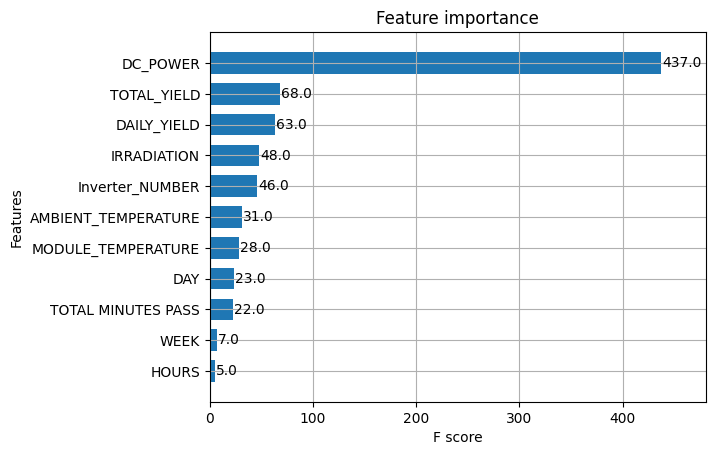

In [ ]:
xgb.plot_importance(xgb_model_1, max_num_features=28, height=0.7)

After that we will fit the XGBoost Regressor using the number of rounds identified from the above step and check the cross validation scores

In [ ]:
xgb_params_1['num_round'] = xgb_model_1.best_iteration
xgb_model_final_1 = xgb.XGBRegressor(**xgb_params_1)
xgb_scores_1 = cv_score(xgb_model_final_1)


1 of kfold 5
Valid RMSE: 1.73660,Valid R2 Score : 99.99769

2 of kfold 5
Valid RMSE: 1.77622,Valid R2 Score : 99.99762

3 of kfold 5
Valid RMSE: 1.98522,Valid R2 Score : 99.99701

4 of kfold 5
Valid RMSE: 1.89197,Valid R2 Score : 99.99729

5 of kfold 5
Valid RMSE: 1.71950,Valid R2 Score : 99.99771


In [ ]:
xgb_train_test_8 = xgb.XGBRegressor(random_state = 0, objective = "reg:linear", n_estimators = 338,max_depth = 10,min_child_weight = 10,
                             colsample_bylevel = 1,colsample_bytree = 0.7,eval_metric = "rmse",reg_alpha = 1,reg_lambda = 0.5,learning_rate = 0.1,subsample = 0.7,gamma = 3)
xgb_train_test_score = train_test_score(xgb_train_test_8)

Train R2 SCORE:  0.9999722834789929
Test R2 SCORE:  0.9994562539112853
Diff of Train Test R2 SCORE:  0.0005160295677075766


### 9.7.3 Appling model

In [ ]:
import xgboost as xgb

In [ ]:
xgb_cv_scores = cv_score(xgb.XGBRegressor(random_state = 0, max_depth = 5, objective = "reg:linear", n_estimators = 100,min_child_weight = 3,colsample_bylevel = 1,eval_metric = "rmse",learning_rate = 1, reg_alpha = 0.5, reg_lambda = 0.5, subsample = 0.7, colsample_bytree = 1, gamma = 25))


1 of kfold 5
Valid RMSE: 1.73660,Valid R2 Score : 99.99769

2 of kfold 5
Valid RMSE: 1.77622,Valid R2 Score : 99.99762

3 of kfold 5
Valid RMSE: 1.98522,Valid R2 Score : 99.99701

4 of kfold 5
Valid RMSE: 1.89197,Valid R2 Score : 99.99729

5 of kfold 5
Valid RMSE: 1.71950,Valid R2 Score : 99.99771


In [ ]:
xgb_train_tes_score = xgb.XGBRegressor(random_state = 0, objective = "reg:linear", n_estimators = 338,max_depth = 10,min_child_weight = 10,
                             colsample_bylevel = 1,colsample_bytree = 0.7,eval_metric = "rmse",reg_alpha = 1,reg_lambda = 0.5,learning_rate = 0.1,subsample = 0.7,gamma = 3)
xgb_train_test_score = train_test_score(xgb_train_test_8)

Train R2 SCORE:  0.9999722834789929
Test R2 SCORE:  0.9994562539112853
Diff of Train Test R2 SCORE:  0.0005160295677075766


## **9.8 Stacking**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
# Model Definitions for feeding into Stacking
DT_clf = DecisionTreeRegressor(random_state= 0,min_samples_leaf=5, min_samples_split=2, max_depth=15, max_features=25)
RF_clf = RandomForestRegressor(random_state= 3,n_estimators= 100,max_depth = 20,min_samples_split = 2,n_jobs = 1,min_samples_leaf = 1,max_features = 20)

In [ ]:
# Importing Stacking regressor from mlxtend


stacked_clf = StackingCVRegressor(
    regressors=[DT_clf, RF_clf],
    meta_regressor=Ridge(), random_state= 7
)

In [ ]:
stacking_cv_scores = cv_score(stacked_clf)


1 of kfold 5
Valid RMSE: 0.41490,Valid R2 Score : 99.99987

2 of kfold 5
Valid RMSE: 0.40130,Valid R2 Score : 99.99988

3 of kfold 5
Valid RMSE: 0.33548,Valid R2 Score : 99.99991

4 of kfold 5
Valid RMSE: 0.43001,Valid R2 Score : 99.99986

5 of kfold 5
Valid RMSE: 0.61400,Valid R2 Score : 99.99971


In [ ]:
stacking_train_test_score = train_test_score(stacked_clf)

Train R2 SCORE:  0.9999996629406461
Test R2 SCORE:  0.9999992421934366
Diff of Train Test R2 SCORE:  4.2074720951745803e-07


# **10. Comparison of Different model fold wise on the basies of RMSE**

<Axes: >

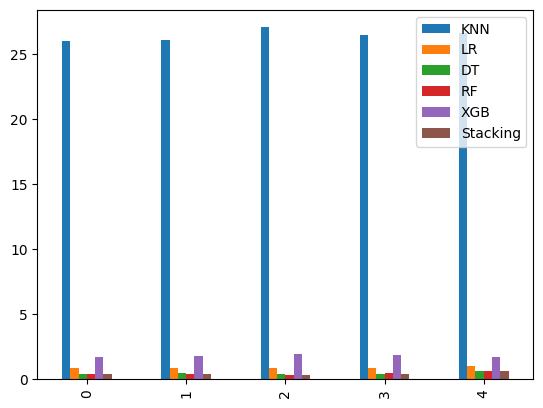

In [ ]:
results_df = pd.DataFrame({'KNN': KNN_cv_scores, 'LR': LR_cv_scores, 'DT': DT_cv_scores, 'RF':RF_cv_scores , 'XGB': xgb_cv_scores, 'Stacking':stacking_cv_scores})
results_df.plot(y=["KNN","LR","DT","RF", "XGB", "Stacking"], kind="bar")

<Axes: >

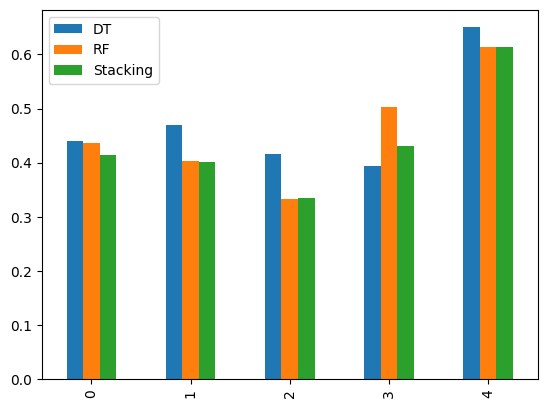

In [ ]:
results_df.plot(y=["DT","RF", "Stacking"], kind="bar")

<Axes: >

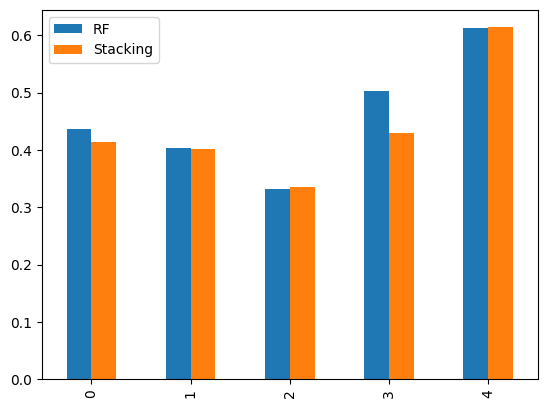

In [ ]:
results_df.plot(y=["RF", "Stacking"], kind="bar")

<code style="background:yellow;color:red">•Identified the optimal predictive model, achieving an exceptional R2 score of 99.99% and minimizing root mean square error (RMSE) to 0.3354 through a strategic combination of Decision Tree and Random Forest stacking. </code>